In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
data = pd.read_excel('Org Profiling Case Study Data.xlsx',sheet_name = 'Data')

In [ ]:
data.head(2)

Employee_Name  Salary  Terminated                 Position  \
0       Adinolfi, Wilson  K   62506           0  Production Technician I   
1  Ait Sidi, Karthikeyan     104437           1                  Sr. DBA   

         DOB Gender Marital_Status Hiring_Date Termination_Date  \
0 1983-10-07     M          Single  2011-05-07              NaT   
1 1975-05-05     M         Married  2015-03-30       2016-06-16   

  Termination_Reason  ...    Manager_Name Manager_ID Recruitment_Source  \
0  N/A-StillEmployed  ...  Michael Albert       22.0           LinkedIn   
1      career change  ...      Simon Roup        4.0             Indeed   

   Performance_Score Engagement_Survey Satisfaction_Score  Num_Spc_Projects  \
0            Exceeds              4.60                  5                 0   
1        Fully Meets              4.96                  3                 6   

   Last_Perf_Review_Date  Dayslate30 Num_Absences  
0             2019-01-17           0            1  
1             2016-02-24           0           17  

[2 rows x 22 columns]

In [ ]:
data.info()        # Variable type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Employee_Name          311 non-null    object        
 1   Salary                 311 non-null    int64         
 2   Terminated             311 non-null    int64         
 3   Position               311 non-null    object        
 4   DOB                    311 non-null    datetime64[ns]
 5   Gender                 311 non-null    object        
 6   Marital_Status         311 non-null    object        
 7   Hiring_Date            311 non-null    datetime64[ns]
 8   Termination_Date       104 non-null    datetime64[ns]
 9   Termination_Reason     311 non-null    object        
 10  Curr_Emp_Status        311 non-null    object        
 11  Department             311 non-null    object        
 12  Manager_Name           311 non-null    object        
 13  Manag

**Dropping Column**

* All variables have correct datatype except 'Manager_ID' which should be int64 instead of float64, so it will need type casting.

* Since 'Manager_ID' is related to 'Manager_Name',  hence it is not useful. So 'Manager_ID' can be dropped.



In [ ]:
data = data.drop('Manager_ID', axis = 1)

In [ ]:
data.dtypes

Employee_Name                    object
Salary                            int64
Terminated                        int64
Position                         object
DOB                      datetime64[ns]
Gender                           object
Marital_Status                   object
Hiring_Date              datetime64[ns]
Termination_Date         datetime64[ns]
Termination_Reason               object
Curr_Emp_Status                  object
Department                       object
Manager_Name                     object
Recruitment_Source               object
Performance_Score                object
Engagement_Survey               float64
Satisfaction_Score                int64
Num_Spc_Projects                  int64
Last_Perf_Review_Date    datetime64[ns]
Dayslate30                        int64
Num_Absences                      int64
dtype: object

In [ ]:
# integers go wrong as an object.

* Variables get read in Python in the right format.

In [ ]:
data.columns

Index(['Employee_Name', 'Salary', 'Terminated', 'Position', 'DOB', 'Gender',
       'Marital_Status', 'Hiring_Date', 'Termination_Date',
       'Termination_Reason', 'Curr_Emp_Status', 'Department', 'Manager_Name',
       'Recruitment_Source', 'Performance_Score', 'Engagement_Survey',
       'Satisfaction_Score', 'Num_Spc_Projects', 'Last_Perf_Review_Date',
       'Dayslate30', 'Num_Absences'],
      dtype='object')

In [ ]:
categorical = [col for col in data.columns if data[col].dtypes == 'O']
print('The Categorical variables are : \n ', categorical)

The Categorical variables are : 
  ['Employee_Name', 'Position', 'Gender', 'Marital_Status', 'Termination_Reason', 'Curr_Emp_Status', 'Department', 'Manager_Name', 'Recruitment_Source', 'Performance_Score']


In [ ]:
Numerical = [col for col in data.columns if (data[col].dtypes == 'int64') or (data[col].dtypes == 'float64') ]
print('The Numerical variables are : \n ', Numerical)

The Numerical variables are : 
  ['Salary', 'Terminated', 'Engagement_Survey', 'Satisfaction_Score', 'Num_Spc_Projects', 'Dayslate30', 'Num_Absences']


#### Finding percentage of missing values

In [ ]:
(data.isnull().mean()*100).sort_values(ascending = False)

Termination_Date         66.559486
Employee_Name             0.000000
Department                0.000000
Dayslate30                0.000000
Last_Perf_Review_Date     0.000000
Num_Spc_Projects          0.000000
Satisfaction_Score        0.000000
Engagement_Survey         0.000000
Performance_Score         0.000000
Recruitment_Source        0.000000
Manager_Name              0.000000
Curr_Emp_Status           0.000000
Salary                    0.000000
Termination_Reason        0.000000
Hiring_Date               0.000000
Marital_Status            0.000000
Gender                    0.000000
DOB                       0.000000
Position                  0.000000
Terminated                0.000000
Num_Absences              0.000000
dtype: float64

* 'Termination_Date' has 66.559486% missing values.

#### Checking duplicate Records

In [ ]:
data.duplicated().sum()

0

* No duplicate rows in the dataset.

#### Checking for Outliers using Boxplot

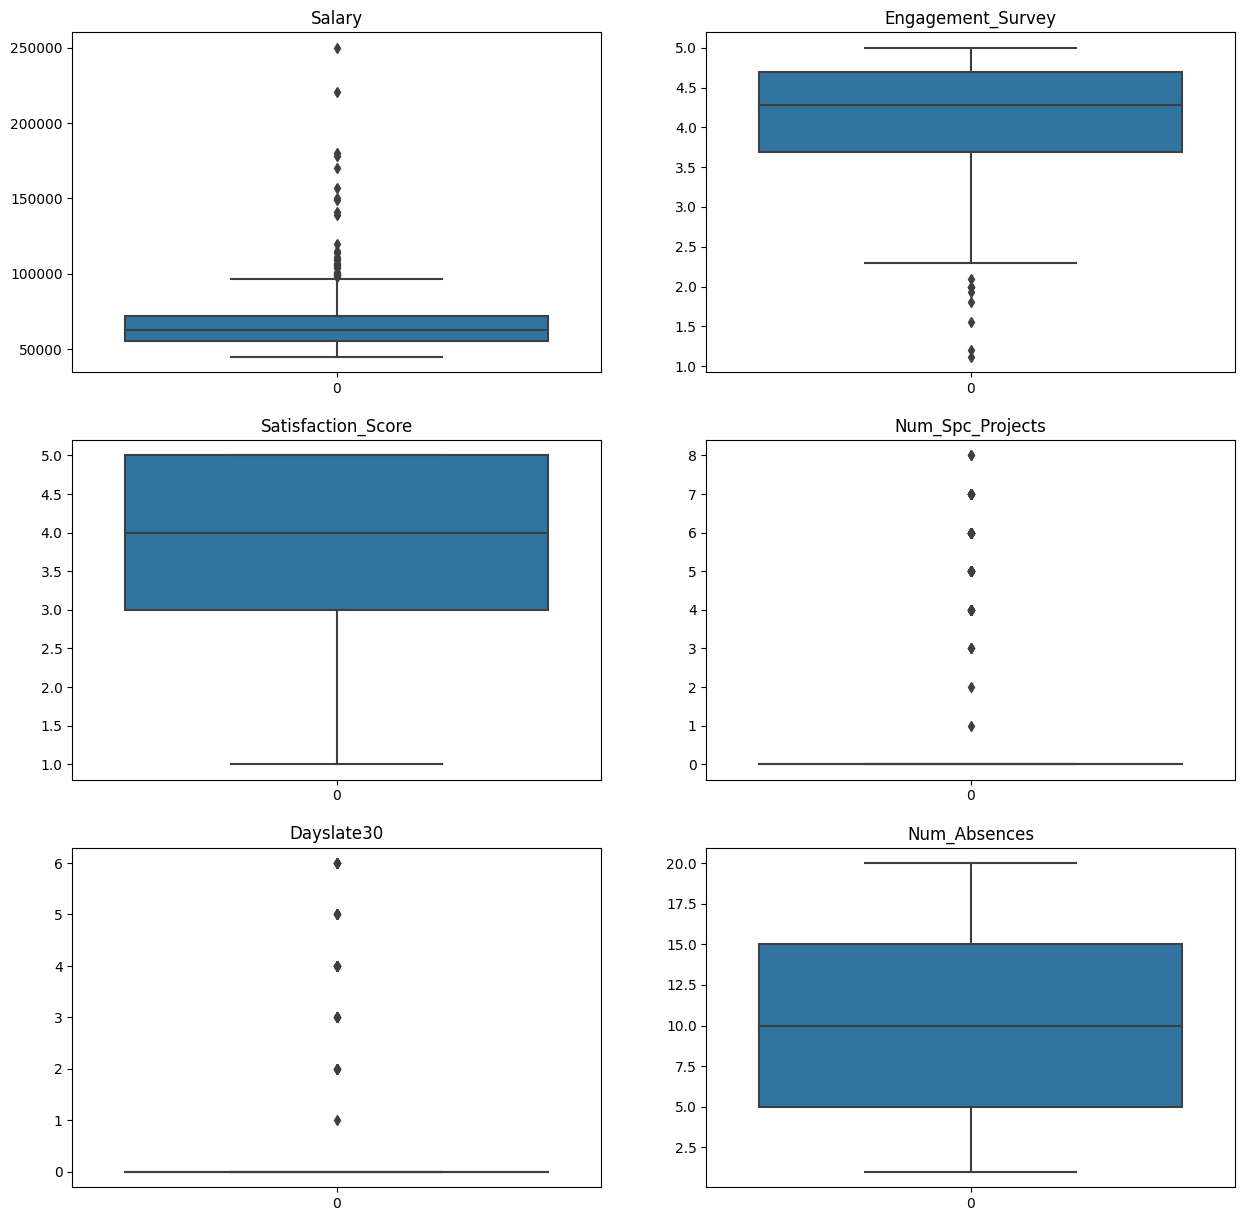

In [ ]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.boxplot(data = data["Salary"])
plt.title('Salary')

plt.subplot(3,2,2)
sns.boxplot(data = data["Engagement_Survey"])
plt.title('Engagement_Survey')


plt.subplot(3,2,3)
sns.boxplot(data = data["Satisfaction_Score"])
plt.title('Satisfaction_Score')

plt.subplot(3,2,4)
sns.boxplot(data = data["Num_Spc_Projects"])
plt.title('Num_Spc_Projects')

plt.subplot(3,2,5)
sns.boxplot(data = data["Dayslate30"])
plt.title('Dayslate30')

plt.subplot(3,2,6)
sns.boxplot(data = data["Num_Absences"])
plt.title('Num_Absences')
plt.show()

#### Outliers Exist for the following features:

1. Salary
2. Engagement Survey- The outliers lie in the range of 1 to 2.5 ->  The employees are coming for name sake.
3. Dayslate30, Num_spc_projects - flat boxplot, it has no significant plot in boxplot. These features are insignificant. We can drop these columns.

In [ ]:
data.head()

Employee_Name  Salary  Terminated                  Position  \
0       Adinolfi, Wilson  K   62506           0   Production Technician I   
1  Ait Sidi, Karthikeyan     104437           1                   Sr. DBA   
2         Akinkuolie, Sarah   64955           1  Production Technician II   
3              Alagbe,Trina   64991           0   Production Technician I   
4          Anderson, Carol    50825           1   Production Technician I   

         DOB Gender Marital_Status Hiring_Date Termination_Date  \
0 1983-10-07     M          Single  2011-05-07              NaT   
1 1975-05-05     M         Married  2015-03-30       2016-06-16   
2 1988-09-19      F        Married  2011-05-07       2012-09-24   
3 1988-09-27      F        Married  2008-07-01              NaT   
4 1989-08-09      F       Divorced  2011-11-07       2016-06-09   

  Termination_Reason  ...         Department    Manager_Name  \
0  N/A-StillEmployed  ...  Production         Michael Albert   
1      career change  ...              IT/IS      Simon Roup   
2              hours  ...  Production         Kissy Sullivan   
3  N/A-StillEmployed  ...  Production           Elijiah Gray   
4   return to school  ...  Production         Webster Butler   

  Recruitment_Source Performance_Score Engagement_Survey  Satisfaction_Score  \
0           LinkedIn           Exceeds              4.60                   5   
1             Indeed       Fully Meets              4.96                   3   
2           LinkedIn       Fully Meets              3.02                   3   
3             Indeed       Fully Meets              4.84                   5   
4      Google Search       Fully Meets              5.00                   4   

   Num_Spc_Projects  Last_Perf_Review_Date Dayslate30  Num_Absences  
0                 0             2019-01-17          0             1  
1                 6             2016-02-24          0            17  
2                 0             2012-05-15          0             3  
3                 0             2019-03-01          0            15  
4                 0             2016-01-02          0             2  

[5 rows x 21 columns]

#### Checking variables for extra spaces, special characters,unexpected values, etc.

* Employee_Name - Column contains "-" which needs to be dealt with '-'.


#### Encoding (Replacement of Values by OneHot Encoding)
* Gender,
* Marital_Status,
* Position,
* Termination_Reason,
* Curr_Emp_Status,
* Department,
* Recruitment_Source,
* Performance_Score.

### EDD

In [ ]:
col = data.columns
col

Index(['Employee_Name', 'Salary', 'Terminated', 'Position', 'DOB', 'Gender',
       'Marital_Status', 'Hiring_Date', 'Termination_Date',
       'Termination_Reason', 'Curr_Emp_Status', 'Department', 'Manager_Name',
       'Recruitment_Source', 'Performance_Score', 'Engagement_Survey',
       'Satisfaction_Score', 'Num_Spc_Projects', 'Last_Perf_Review_Date',
       'Dayslate30', 'Num_Absences'],
      dtype='object')

#### Percentage of Unique values

(count of unique values/ total number of values) * 100

In [ ]:
for i in col:
    print(i, 'percent :' ,(len(data[i].unique())/len(data[i])) * 100)

Employee_Name percent : 100.0
Salary percent : 99.03536977491962
Terminated percent : 0.6430868167202572
Position percent : 10.289389067524116
DOB percent : 98.71382636655949
Gender percent : 0.6430868167202572
Marital_Status percent : 1.607717041800643
Hiring_Date percent : 32.475884244372985
Termination_Date percent : 31.189710610932476
Termination_Reason percent : 5.787781350482315
Curr_Emp_Status percent : 0.964630225080386
Department percent : 1.929260450160772
Manager_Name percent : 6.752411575562702
Recruitment_Source percent : 2.8938906752411575
Performance_Score percent : 1.2861736334405145
Engagement_Survey percent : 38.263665594855304
Satisfaction_Score percent : 1.607717041800643
Num_Spc_Projects percent : 2.8938906752411575
Last_Perf_Review_Date percent : 44.05144694533762
Dayslate30 percent : 2.2508038585209005
Num_Absences percent : 6.430868167202572


### Percentage missing values

In [ ]:
(data.isnull().mean()*100)

Employee_Name             0.000000
Salary                    0.000000
Terminated                0.000000
Position                  0.000000
DOB                       0.000000
Gender                    0.000000
Marital_Status            0.000000
Hiring_Date               0.000000
Termination_Date         66.559486
Termination_Reason        0.000000
Curr_Emp_Status           0.000000
Department                0.000000
Manager_Name              0.000000
Recruitment_Source        0.000000
Performance_Score         0.000000
Engagement_Survey         0.000000
Satisfaction_Score        0.000000
Num_Spc_Projects          0.000000
Last_Perf_Review_Date     0.000000
Dayslate30                0.000000
Num_Absences              0.000000
dtype: float64

In [ ]:
data.describe(percentiles = [.01, .05, .25, .50, .75, .95, .99]).T

count          mean           std       min         1%  \
Salary              311.0  69020.684887  25156.636930  45046.00  45398.800   
Terminated          311.0      0.334405      0.472542      0.00      0.000   
Engagement_Survey   311.0      4.110000      0.789938      1.12      1.822   
Satisfaction_Score  311.0      3.890675      0.909241      1.00      2.000   
Num_Spc_Projects    311.0      1.218650      2.349421      0.00      0.000   
Dayslate30          311.0      0.414791      1.294519      0.00      0.000   
Num_Absences        311.0     10.237942      5.852596      1.00      1.000   

                         5%       25%       50%      75%       95%       99%  \
Salary              46999.5  55501.50  62810.00  72036.0  108106.5  177250.0   
Terminated              0.0      0.00      0.00      1.0       1.0       1.0   
Engagement_Survey       2.4      3.69      4.28      4.7       5.0       5.0   
Satisfaction_Score      3.0      3.00      4.00      5.0       5.0       5.0   
Num_Spc_Projects        0.0      0.00      0.00      0.0       6.0       7.0   
Dayslate30              0.0      0.00      0.00      0.0       4.0       6.0   
Num_Absences            2.0      5.00     10.00     15.0      19.0      20.0   

                         max  
Salary              250000.0  
Terminated               1.0  
Engagement_Survey        5.0  
Satisfaction_Score       5.0  
Num_Spc_Projects         8.0  
Dayslate30               6.0  
Num_Absences            20.0

### EDA

### Univariate analysis
Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.



### Pandas Profiling

In [ ]:
#pip install pandas_profiling

In [ ]:
from pandas_profiling import ProfileReport
report = ProfileReport(data)
report


/var/folders/fj/kksk8jwj0r166kvqshtk4fxc0000gn/T/ipykernel_6781/3791524838.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 1. Categorical

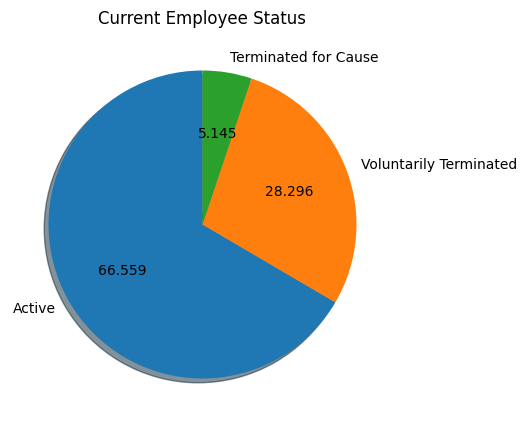

In [ ]:
emp_status = data["Curr_Emp_Status"].value_counts()
plt.figure(figsize= (5,5))
plt.pie(emp_status,labels=emp_status.index,autopct="%.3f",startangle=90,shadow=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
plt.title('Current Employee Status')
plt.show()

* Employee_Name -> has the highest cardinality, with 100% distinct values.

* Position -> has the highest employees i.e. 137 in 'Production Technician I' .

* Gender -> has the highest number of 'Female' employees with count of 176 and then comes 'Male' employees with
  count of 135.

* Marital_Status -> has the highest number of employees who are in 'Single' Category and the lowest in 'Widowed'
  category.
  
* Termination_Reason -> It has '207' active employees. The termination reason for which employees have left
  is highest for the cause 'Another position'.
  
* Curr_Emp_Status -> It's Active employees are '207' has 66.559% . '88' Employees have taken 'Voluntarily Termination' has '28.296%' and the   remaining '16' employees are 'Terminated for Cause' has '5.145%'.

* Manager_Name -> The managers with name '(Michael Albert ,Kissy Sullivan, Elijiah Gray, Kelley Spirea,
  Brannon Miller) are managing the highest number of employees i.e. 22 employees.
  
* Recruitment_Source -> From 'Indeed' the highest number of employees are recruited i.e. '87' employees.

* Performance_Score -> The maximum number of employees i.e. '243' have performance which is 'Fully Meets' .
  The lowest employees are given  'PIP' with employee numbers '13'.
  


### 2. Numerical

* Salary -> Minimum salary is '45046' and Maximum salary is '250000'. The maximum employees lie in the range of     salary range of 70000 - 75000.

* Terminated -> '0' denotes 'Active Employees', which has '207' employees.
               '1' denotes 'Terminated', which has '104' employees.
               
* Engagement_Survey -> 'Minimum' value is 1.12. 'Maximum' value is 5. Maximum Employees around '60' have given  
  Survey_Rating as 5.

* Satisfaction_Score -> 'Minimum' score is 1 . 'Maximum' score is 5. Maximaum Employees around '108' have given  
  score as 3.
  
* Num_Spc_Projects -> 'Minimum' number of Project is 0 and 'Maximum' number of projects are '8'. Around '240' employees have done '0' projects and around '2' employees have done '8' number of projects.

* Dayslate30 -> Employees late in last 30 days have 'Minimum' number of days is '0' and 'Maximum' number of days
  as '6' in a week. The number of employees being late are around '6' for 6 days in a week.
  And highest number of employees around '278' are late for '0' days.
  
* Num_Absences -> Minimum' number of Absences is 1 and 'Maximum' number of Absences are '20'.
               



### Bivariate Analysis

* **Position vs Gender**

In [ ]:

cross_tab = pd.crosstab(index=data['Position'],
                        columns=data['Gender'])

cross_tab_prop = pd.crosstab(index=data['Position'],
                             columns=data['Gender'],
                             normalize="columns")

print(cross_tab_prop * 100)


Gender                                F         M 
Position                                          
Accountant I                   0.568182   1.481481
Administrative Assistant       1.704545   0.000000
Area Sales Manager             6.818182  11.111111
BI Developer                   0.568182   2.222222
BI Director                    0.000000   0.740741
CIO                            0.568182   0.000000
Data Analyst                   1.704545   2.962963
Data Analyst                   0.000000   0.740741
Data Architect                 0.568182   0.000000
Database Administrator         2.272727   0.740741
Director of Operations         0.000000   0.740741
Director of Sales              0.568182   0.000000
Enterprise Architect           0.000000   0.740741
IT Director                    0.000000   0.740741
IT Manager - DB                0.000000   1.481481
IT Manager - Infra             0.000000   0.740741
IT Manager - Support           0.000000   0.740741
IT Support                     

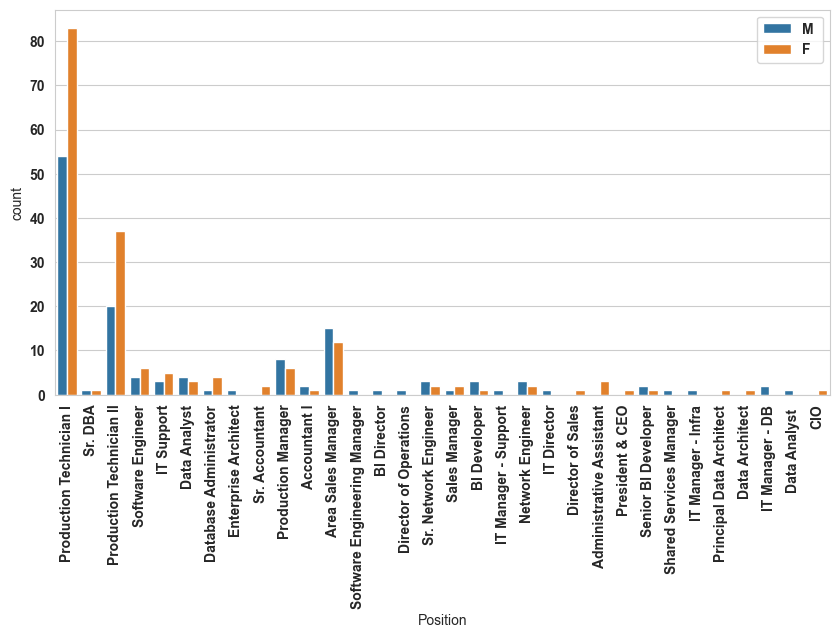

In [ ]:
plt.figure(figsize= (10,5))
sns.set_style('whitegrid')
sns.countplot(x = data["Position"], hue=data["Gender"])
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

* Employees in position 'Production Technician I' are the highest i.e around 137 among all the positions in the company.
* The female employees are high in case of 'Production Technician I'

* **Department vs Gender**

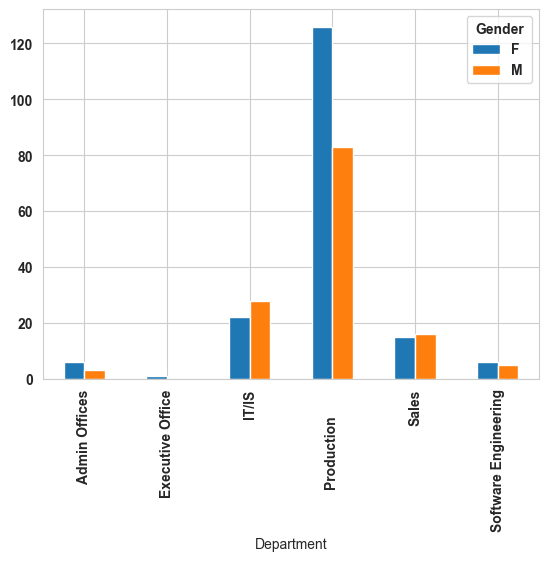

In [ ]:
pd.crosstab(data["Department"],data["Gender"]).plot(kind = "bar" )
plt.show()

* Overall the Employees are more in Department -  'Production'.
* Female employees are more in case of 'Production' Department.

* **Department vs Curr_Emp_Status**

In [ ]:
cross_tab = pd.crosstab(index=data['Department'],
                        columns=data['Curr_Emp_Status'])


cross_tab_prop = pd.crosstab(index=data['Department'],
                             columns=data['Curr_Emp_Status'],
                            normalize="columns")

print(cross_tab_prop * 100)

Curr_Emp_Status          Active  Terminated for Cause  Voluntarily Terminated
Department                                                                   
Admin Offices          3.381643                  6.25                1.136364
Executive Office       0.483092                  0.00                0.000000
IT/IS                 19.323671                 25.00                6.818182
Production            60.869565                 50.00               85.227273
Sales                 12.560386                 12.50                3.409091
Software Engineering   3.381643                  6.25                3.409091


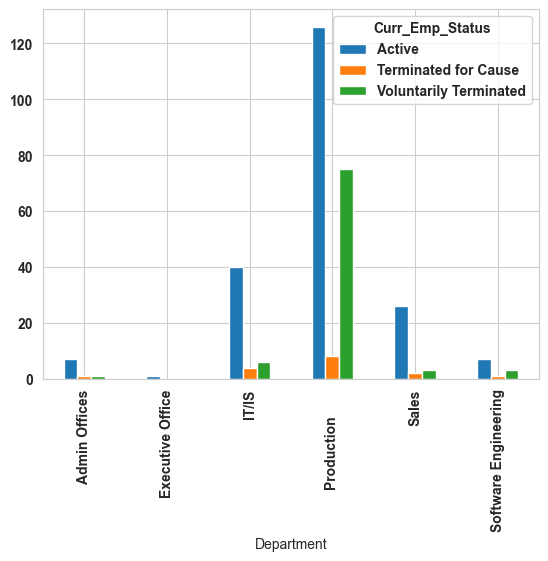

In [ ]:
pd.crosstab(data["Department"],data["Curr_Emp_Status"]).plot(kind = "bar" )
plt.show()

* The 'Department' - 'Production' has the highest number of 'Active', 'Terminated for Cause', and
  'Voluntarily Terminated' employees.
* The 'Department' - 'Admin Offices' has the lowest number of 'Active', 'Terminated for Cause', and
  'Voluntarily Terminated' employees.

* **Marital_Status vs Curr_Emp_Status**

In [ ]:
cross_tab = pd.crosstab(index=data['Marital_Status'],
                        columns=data['Curr_Emp_Status'])


cross_tab_prop = pd.crosstab(index=data['Marital_Status'],
                             columns=data['Curr_Emp_Status'],
                            normalize="columns")

print(cross_tab_prop * 100)

Curr_Emp_Status     Active  Terminated for Cause  Voluntarily Terminated
Marital_Status                                                          
Divorced          6.763285                  0.00               18.181818
Married          37.198068                 43.75               45.454545
Separated         5.314010                  0.00                1.136364
Single           48.792271                 50.00               31.818182
Widowed           1.932367                  6.25                3.409091


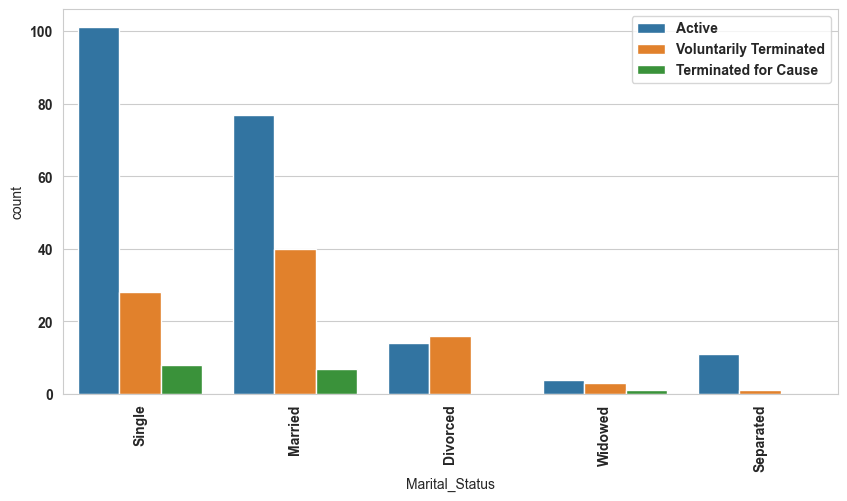

In [ ]:
plt.figure(figsize= (10,5))
sns.set_style('whitegrid')
sns.countplot(x = data["Marital_Status"], hue=data["Curr_Emp_Status"])
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

* With 'Curr_Emp_Status' - 'Active' and 'Terminated for Cause' has more number of employees as 'Single'.
* With 'Married_Status' as - 'Married' employees have taken left company with  'Voluntarily Termination'.
* 'Marital_Status' as 'Widow' are the least 'Active' employees.


* **Curr_Emp_Status v/s Gender**

In [ ]:
cross_tab = pd.crosstab(index=data['Curr_Emp_Status'],
                        columns=data['Gender'])


cross_tab_prop = pd.crosstab(index=data['Curr_Emp_Status'],
                             columns=data['Gender'],
                            normalize="index")

print(cross_tab_prop * 100)

Gender                          F         M 
Curr_Emp_Status                             
Active                  56.038647  43.961353
Terminated for Cause    56.250000  43.750000
Voluntarily Terminated  57.954545  42.045455


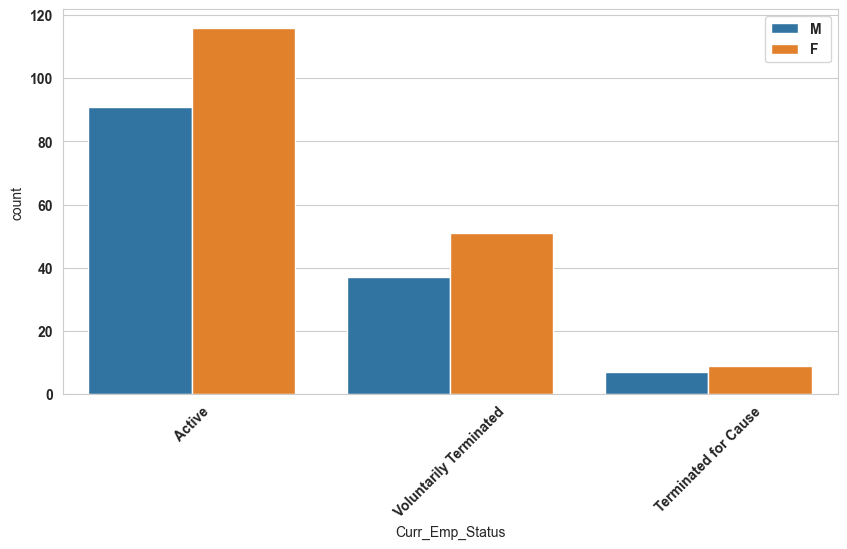

In [ ]:
plt.figure(figsize= (10,5))
sns.set_style('whitegrid')
sns.countplot(x = data["Curr_Emp_Status"], hue=data["Gender"])
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

* More 'Female' employees are with 'Current_Emp_Status' as 'Active', 'Terminated for Cause' and
  'Voluntarily Termination' than 'Male' employees.

* **Manager_Name vs Curr_Emp_Status**

In [ ]:
cross_tab = pd.crosstab(index=data['Manager_Name'],
                        columns=data["Curr_Emp_Status"])


cross_tab_prop = pd.crosstab(index=data['Manager_Name'],
                             columns=data["Curr_Emp_Status"],
                             normalize="columns")
print(cross_tab_prop*100)

Curr_Emp_Status       Active  Terminated for Cause  Voluntarily Terminated
Manager_Name                                                              
Alex Sweetwater     2.898551                  6.25                2.272727
Amy Dunn            3.864734                  0.00               14.772727
Board of Directors  0.966184                  0.00                0.000000
Brandon R. LeBlanc  2.415459                  6.25                1.136364
Brannon Miller      7.729469                  0.00                6.818182
Brian Champaigne    3.864734                  0.00                0.000000
David Stanley       7.246377                  0.00                6.818182
Debra Houlihan      0.966184                  0.00                1.136364
Elijiah Gray        6.763285                  6.25                7.954545
Eric Dougall        1.932367                  0.00                0.000000
Janet King          6.280193                  6.25                5.681818
Jennifer Zamora     2.898

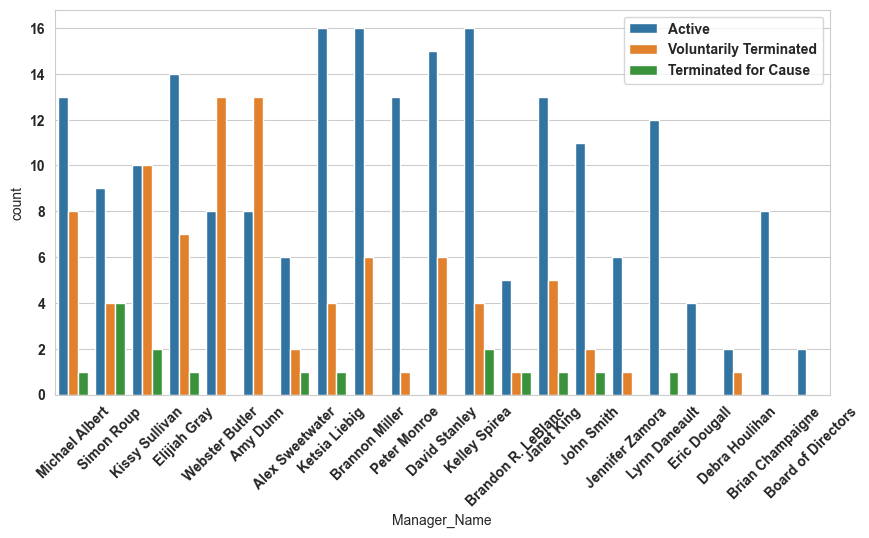

In [ ]:
plt.figure(figsize= (10,5))
sns.set_style('whitegrid')
sns.countplot(x = data["Manager_Name"], hue=data["Curr_Emp_Status"])
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot: xlabel='Manager_Name'>

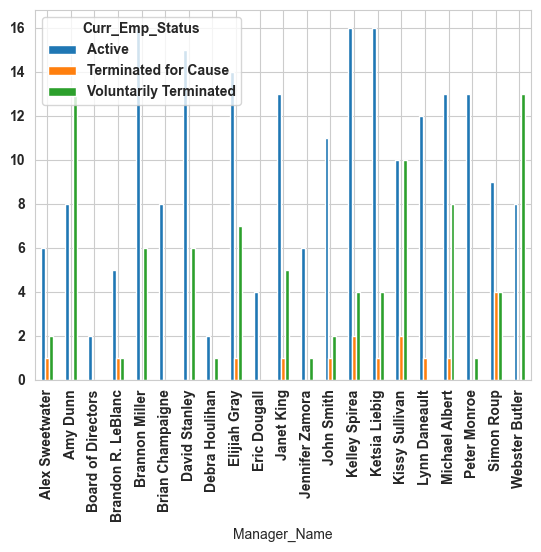

In [ ]:
pd.crosstab(data["Manager_Name"],data["Curr_Emp_Status"]).plot(kind = "bar" )

* For 'Manager_Name' - 'Brannon Miller', 'Kelley Spirea' and 'Ketsia Liebig' has more number of 'Active'         employees than other managers.
* For 'Manager_Name' - 'Simon Roup' has more employees are terminated with reason 'Terminated for cause'.

* For 'Manager_Name' - 'Amy Dunn' and 'Webster Butler'
  Employees have taken 'Voluntary Termination' resulting more attrition (around 13 )

### Countplot and crosstab gives same output in graph

* **Salary vs Gender**

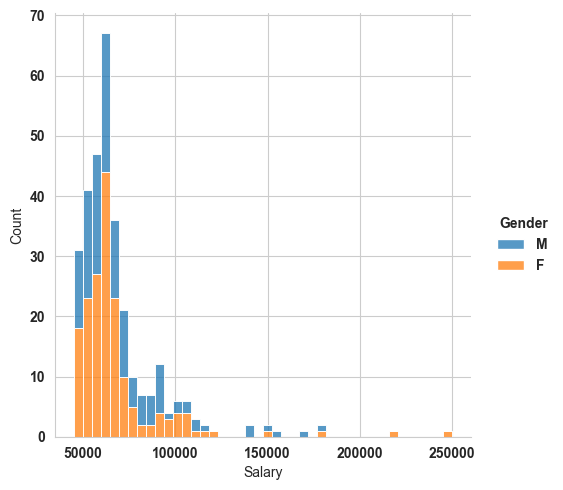

In [ ]:
sns.displot(data = data,x = 'Salary',hue= 'Gender', kind='hist',multiple="stack")

* Employees with "Salary" around 65k-70k are more in the organisation.
* Females with "Salary" range between 65k to 70k are more.
* Overall "Gender" with the highest paying salaries are "Females".

## Section 4

### Active Employees

In [ ]:
active_emp = data[data["Terminated"] == 0] # active employees
active_emp.head()

Employee_Name  Salary  Terminated                 Position  \
0  Adinolfi, Wilson  K   62506           0  Production Technician I   
3         Alagbe,Trina   64991           0  Production Technician I   
5    Anderson, Linda     57568           0  Production Technician I   
6      Andreola, Colby   95660           0        Software Engineer   
7          Athwal, Sam   59365           0  Production Technician I   

         DOB Gender Marital_Status Hiring_Date Termination_Date  \
0 1983-10-07     M          Single  2011-05-07              NaT   
3 1988-09-27      F        Married  2008-07-01              NaT   
5 1977-05-22      F         Single  2012-09-01              NaT   
6 1979-05-24      F         Single  2014-10-11              NaT   
7 1983-02-18     M         Widowed  2013-09-30              NaT   

  Termination_Reason  ...            Department     Manager_Name  \
0  N/A-StillEmployed  ...     Production          Michael Albert   
3  N/A-StillEmployed  ...     Production            Elijiah Gray   
5  N/A-StillEmployed  ...     Production                Amy Dunn   
6  N/A-StillEmployed  ...  Software Engineering  Alex Sweetwater   
7  N/A-StillEmployed  ...     Production           Ketsia Liebig   

  Recruitment_Source Performance_Score Engagement_Survey  Satisfaction_Score  \
0           LinkedIn           Exceeds              4.60                   5   
3             Indeed       Fully Meets              4.84                   5   
5           LinkedIn           Exceeds              5.00                   5   
6           LinkedIn       Fully Meets              3.04                   3   
7  Employee Referral       Fully Meets              5.00                   4   

   Num_Spc_Projects  Last_Perf_Review_Date Dayslate30  Num_Absences  
0                 0             2019-01-17          0             1  
3                 0             2019-03-01          0            15  
5                 0             2019-07-01          0            15  
6                 4             2019-02-01          0            19  
7                 0             2019-02-25          0            19  

[5 rows x 21 columns]

In [ ]:
from datetime import datetime

date_str = '2018-12-31'

date_object = datetime.strptime(date_str, '%Y-%m-%d').date()

In [ ]:
date_str = pd.to_datetime(date_object)
date_str

Timestamp('2018-12-31 00:00:00')

In [ ]:
active_emp['Termination_Date'].fillna(date_str,axis= 0,inplace= True)

/var/folders/fj/kksk8jwj0r166kvqshtk4fxc0000gn/T/ipykernel_6781/463001704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_emp['Termination_Date'].fillna(date_str,axis= 0,inplace= True)


In [ ]:
active_emp.head()

Employee_Name  Salary  Terminated                 Position  \
0  Adinolfi, Wilson  K   62506           0  Production Technician I   
3         Alagbe,Trina   64991           0  Production Technician I   
5    Anderson, Linda     57568           0  Production Technician I   
6      Andreola, Colby   95660           0        Software Engineer   
7          Athwal, Sam   59365           0  Production Technician I   

         DOB Gender Marital_Status Hiring_Date Termination_Date  \
0 1983-10-07     M          Single  2011-05-07       2018-12-31   
3 1988-09-27      F        Married  2008-07-01       2018-12-31   
5 1977-05-22      F         Single  2012-09-01       2018-12-31   
6 1979-05-24      F         Single  2014-10-11       2018-12-31   
7 1983-02-18     M         Widowed  2013-09-30       2018-12-31   

  Termination_Reason  ...            Department     Manager_Name  \
0  N/A-StillEmployed  ...     Production          Michael Albert   
3  N/A-StillEmployed  ...     Production            Elijiah Gray   
5  N/A-StillEmployed  ...     Production                Amy Dunn   
6  N/A-StillEmployed  ...  Software Engineering  Alex Sweetwater   
7  N/A-StillEmployed  ...     Production           Ketsia Liebig   

  Recruitment_Source Performance_Score Engagement_Survey  Satisfaction_Score  \
0           LinkedIn           Exceeds              4.60                   5   
3             Indeed       Fully Meets              4.84                   5   
5           LinkedIn           Exceeds              5.00                   5   
6           LinkedIn       Fully Meets              3.04                   3   
7  Employee Referral       Fully Meets              5.00                   4   

   Num_Spc_Projects  Last_Perf_Review_Date Dayslate30  Num_Absences  
0                 0             2019-01-17          0             1  
3                 0             2019-03-01          0            15  
5                 0             2019-07-01          0            15  
6                 4             2019-02-01          0            19  
7                 0             2019-02-25          0            19  

[5 rows x 21 columns]

In [ ]:
active_emp["Experience_years"] = (active_emp["Termination_Date"] - active_emp['Hiring_Date']).dt.days/365

/var/folders/fj/kksk8jwj0r166kvqshtk4fxc0000gn/T/ipykernel_6781/2989895652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_emp["Experience_years"] = (active_emp["Termination_Date"] - active_emp['Hiring_Date']).dt.days/365


<AxesSubplot: xlabel='Num_Absences'>

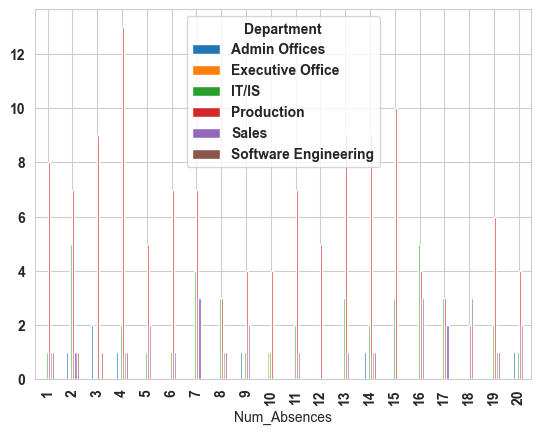

In [ ]:
pd.crosstab(active_emp["Num_Absences"],active_emp["Department"]).plot(kind = "bar")

In [ ]:
cross_tab = pd.crosstab(index=active_emp["Num_Absences"],
                        columns=active_emp["Department"])


cross_tab_prop = pd.crosstab(index=active_emp["Num_Absences"],
                             columns=active_emp["Department"],
                             normalize="index")

print(cross_tab_prop*100)

Department    Admin Offices  Executive Office      IT/IS  Production         \
Num_Absences                                                                  
1                  0.000000          0.000000   9.090909          72.727273   
2                  6.666667          0.000000  33.333333          46.666667   
3                 16.666667          0.000000   0.000000          75.000000   
4                  5.555556          0.000000  11.111111          72.222222   
5                  0.000000          0.000000  12.500000          62.500000   
6                  0.000000          0.000000  11.111111          77.777778   
7                  0.000000          0.000000  28.571429          50.000000   
8                  0.000000          0.000000  37.500000          37.500000   
9                 12.500000          0.000000  12.500000          50.000000   
10                 0.000000         16.666667  16.666667          66.666667   
11                 0.000000          0.000000  20.00

In [ ]:
active_emp["Experience_months"] = active_emp["Experience_years"]*12

/var/folders/fj/kksk8jwj0r166kvqshtk4fxc0000gn/T/ipykernel_6781/2762827516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_emp["Experience_months"] = active_emp["Experience_years"]*12


In [ ]:
active_emp.head()

Employee_Name  Salary  Terminated                 Position  \
0  Adinolfi, Wilson  K   62506           0  Production Technician I   
3         Alagbe,Trina   64991           0  Production Technician I   
5    Anderson, Linda     57568           0  Production Technician I   
6      Andreola, Colby   95660           0        Software Engineer   
7          Athwal, Sam   59365           0  Production Technician I   

         DOB Gender Marital_Status Hiring_Date Termination_Date  \
0 1983-10-07     M          Single  2011-05-07       2018-12-31   
3 1988-09-27      F        Married  2008-07-01       2018-12-31   
5 1977-05-22      F         Single  2012-09-01       2018-12-31   
6 1979-05-24      F         Single  2014-10-11       2018-12-31   
7 1983-02-18     M         Widowed  2013-09-30       2018-12-31   

  Termination_Reason  ... Recruitment_Source Performance_Score  \
0  N/A-StillEmployed  ...           LinkedIn           Exceeds   
3  N/A-StillEmployed  ...             Indeed       Fully Meets   
5  N/A-StillEmployed  ...           LinkedIn           Exceeds   
6  N/A-StillEmployed  ...           LinkedIn       Fully Meets   
7  N/A-StillEmployed  ...  Employee Referral       Fully Meets   

  Engagement_Survey Satisfaction_Score Num_Spc_Projects  \
0              4.60                  5                0   
3              4.84                  5                0   
5              5.00                  5                0   
6              3.04                  3                4   
7              5.00                  4                0   

   Last_Perf_Review_Date  Dayslate30  Num_Absences Experience_years  \
0             2019-01-17           0             1         7.657534   
3             2019-03-01           0            15        10.506849   
5             2019-07-01           0            15         6.334247   
6             2019-02-01           0            19         4.224658   
7             2019-02-25           0            19         5.254795   

   Experience_months  
0          91.890411  
3         126.082192  
5          76.010959  
6          50.695890  
7          63.057534  

[5 rows x 23 columns]

In [ ]:
active_emp["Experience_years"] = active_emp["Experience_years"].round()

/var/folders/fj/kksk8jwj0r166kvqshtk4fxc0000gn/T/ipykernel_6781/1709705059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_emp["Experience_years"] = active_emp["Experience_years"].round()


In [ ]:
active_emp.head()

Employee_Name  Salary  Terminated                 Position  \
0  Adinolfi, Wilson  K   62506           0  Production Technician I   
3         Alagbe,Trina   64991           0  Production Technician I   
5    Anderson, Linda     57568           0  Production Technician I   
6      Andreola, Colby   95660           0        Software Engineer   
7          Athwal, Sam   59365           0  Production Technician I   

         DOB Gender Marital_Status Hiring_Date Termination_Date  \
0 1983-10-07     M          Single  2011-05-07       2018-12-31   
3 1988-09-27      F        Married  2008-07-01       2018-12-31   
5 1977-05-22      F         Single  2012-09-01       2018-12-31   
6 1979-05-24      F         Single  2014-10-11       2018-12-31   
7 1983-02-18     M         Widowed  2013-09-30       2018-12-31   

  Termination_Reason  ... Recruitment_Source Performance_Score  \
0  N/A-StillEmployed  ...           LinkedIn           Exceeds   
3  N/A-StillEmployed  ...             Indeed       Fully Meets   
5  N/A-StillEmployed  ...           LinkedIn           Exceeds   
6  N/A-StillEmployed  ...           LinkedIn       Fully Meets   
7  N/A-StillEmployed  ...  Employee Referral       Fully Meets   

  Engagement_Survey Satisfaction_Score Num_Spc_Projects  \
0              4.60                  5                0   
3              4.84                  5                0   
5              5.00                  5                0   
6              3.04                  3                4   
7              5.00                  4                0   

   Last_Perf_Review_Date  Dayslate30  Num_Absences Experience_years  \
0             2019-01-17           0             1              8.0   
3             2019-03-01           0            15             11.0   
5             2019-07-01           0            15              6.0   
6             2019-02-01           0            19              4.0   
7             2019-02-25           0            19              5.0   

   Experience_months  
0          91.890411  
3         126.082192  
5          76.010959  
6          50.695890  
7          63.057534  

[5 rows x 23 columns]

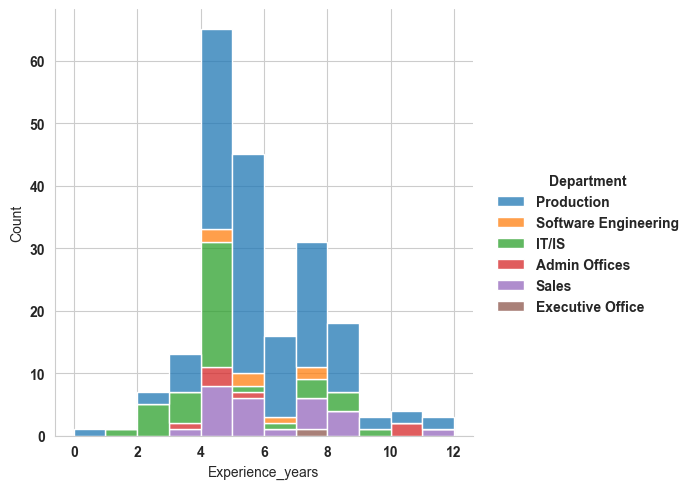

In [ ]:
sns.displot(data= active_emp, x = "Experience_years",hue="Department",kind="hist",multiple = 'stack')

<AxesSubplot: xlabel='Experience_years', ylabel='Num_Absences'>

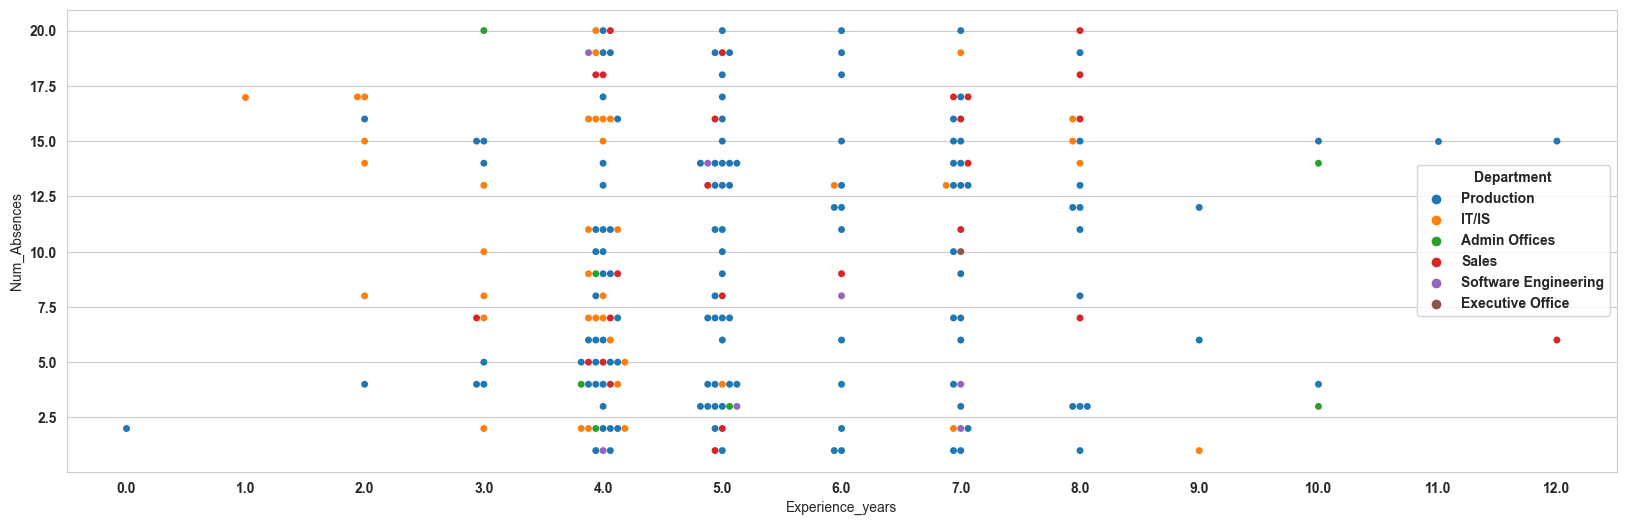

In [ ]:
plt.figure(figsize=(20,6))
sns.swarmplot(x=active_emp["Experience_years"],y=active_emp["Num_Absences"],hue=active_emp["Department"])

* Number of absences are seen to be more with the employees of experience between 4 to 5 years.
* The maximum number of absences are seen in "Production" Department.

#### BINNING OPERATION

In [ ]:
active_emp.loc[active_emp['Experience_months'].between(0, 3, 'right'), 'Employee_Tenure'] = '<=3 months'
active_emp.loc[active_emp['Experience_months'].between(4, 6, 'both'), 'Employee_Tenure'] = '4-6 months'
active_emp.loc[active_emp['Experience_months'].between(7, 12, 'both'), 'Employee_Tenure'] = '7-12 months'
active_emp.loc[active_emp['Experience_months'].between(13, 18, 'both'), 'Employee_Tenure'] = '13-18 months'
active_emp.loc[active_emp['Experience_months'].between(19, 24, 'both'), 'Employee_Tenure'] = '19-24 months'
active_emp.loc[active_emp['Experience_months'].between(24, 36, 'right'), 'Employee_Tenure'] = '2-3 years'
active_emp.loc[active_emp['Experience_months'].between(36, 60, 'right'), 'Employee_Tenure'] = '3-5 years'
active_emp.loc[active_emp['Experience_months'].between(60, 156, 'right'), 'Employee_Tenure'] = '>5 years'


/var/folders/fj/kksk8jwj0r166kvqshtk4fxc0000gn/T/ipykernel_6781/2368675630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_emp.loc[active_emp['Experience_months'].between(0, 3, 'right'), 'Employee_Tenure'] = '<=3 months'


In [ ]:
active_emp.head()

Employee_Name  Salary  Terminated                 Position  \
0  Adinolfi, Wilson  K   62506           0  Production Technician I   
3         Alagbe,Trina   64991           0  Production Technician I   
5    Anderson, Linda     57568           0  Production Technician I   
6      Andreola, Colby   95660           0        Software Engineer   
7          Athwal, Sam   59365           0  Production Technician I   

         DOB Gender Marital_Status Hiring_Date Termination_Date  \
0 1983-10-07     M          Single  2011-05-07       2018-12-31   
3 1988-09-27      F        Married  2008-07-01       2018-12-31   
5 1977-05-22      F         Single  2012-09-01       2018-12-31   
6 1979-05-24      F         Single  2014-10-11       2018-12-31   
7 1983-02-18     M         Widowed  2013-09-30       2018-12-31   

  Termination_Reason  ... Performance_Score Engagement_Survey  \
0  N/A-StillEmployed  ...           Exceeds              4.60   
3  N/A-StillEmployed  ...       Fully Meets              4.84   
5  N/A-StillEmployed  ...           Exceeds              5.00   
6  N/A-StillEmployed  ...       Fully Meets              3.04   
7  N/A-StillEmployed  ...       Fully Meets              5.00   

  Satisfaction_Score Num_Spc_Projects Last_Perf_Review_Date  Dayslate30  \
0                  5                0            2019-01-17           0   
3                  5                0            2019-03-01           0   
5                  5                0            2019-07-01           0   
6                  3                4            2019-02-01           0   
7                  4                0            2019-02-25           0   

   Num_Absences  Experience_years Experience_months  Employee_Tenure  
0             1               8.0         91.890411         >5 years  
3            15              11.0        126.082192         >5 years  
5            15               6.0         76.010959         >5 years  
6            19               4.0         50.695890        3-5 years  
7            19               5.0         63.057534         >5 years  

[5 rows x 24 columns]

### 1.Show the distribution of employees (employed/active ones, as of 31st Dec’2018) for the below variables. Show results using appropriate plots and report your findings:
* Employee Tenure. Use the bins: <=3 months, 4-6 months, 7-12 months, 13-18
months, 19-24 months, 2-3 years, 3-5 years, > 5 years

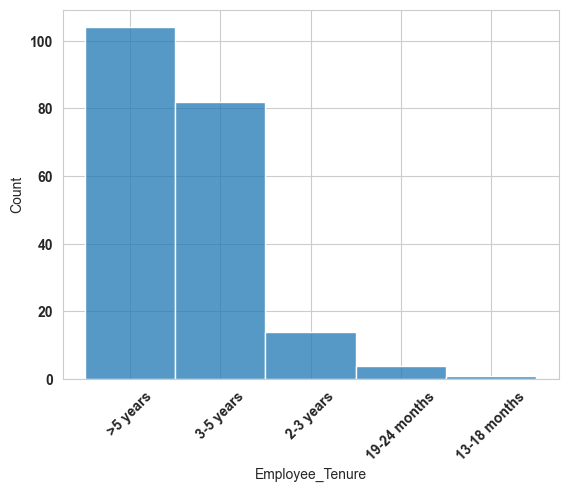

In [ ]:
sns.histplot(active_emp["Employee_Tenure"])   #
plt.xticks(rotation = 45)
plt.show()

## I. Organization size (active Employee count) over the years (consider employees active as of 31 st Dec of every year)

In [ ]:
df = data.copy()

In [ ]:
df.head()

Employee_Name  Salary  Terminated                  Position  \
0       Adinolfi, Wilson  K   62506           0   Production Technician I   
1  Ait Sidi, Karthikeyan     104437           1                   Sr. DBA   
2         Akinkuolie, Sarah   64955           1  Production Technician II   
3              Alagbe,Trina   64991           0   Production Technician I   
4          Anderson, Carol    50825           1   Production Technician I   

         DOB Gender Marital_Status Hiring_Date Termination_Date  \
0 1983-10-07     M          Single  2011-05-07              NaT   
1 1975-05-05     M         Married  2015-03-30       2016-06-16   
2 1988-09-19      F        Married  2011-05-07       2012-09-24   
3 1988-09-27      F        Married  2008-07-01              NaT   
4 1989-08-09      F       Divorced  2011-11-07       2016-06-09   

  Termination_Reason  ...         Department    Manager_Name  \
0  N/A-StillEmployed  ...  Production         Michael Albert   
1      career change  ...              IT/IS      Simon Roup   
2              hours  ...  Production         Kissy Sullivan   
3  N/A-StillEmployed  ...  Production           Elijiah Gray   
4   return to school  ...  Production         Webster Butler   

  Recruitment_Source Performance_Score Engagement_Survey  Satisfaction_Score  \
0           LinkedIn           Exceeds              4.60                   5   
1             Indeed       Fully Meets              4.96                   3   
2           LinkedIn       Fully Meets              3.02                   3   
3             Indeed       Fully Meets              4.84                   5   
4      Google Search       Fully Meets              5.00                   4   

   Num_Spc_Projects  Last_Perf_Review_Date Dayslate30  Num_Absences  
0                 0             2019-01-17          0             1  
1                 6             2016-02-24          0            17  
2                 0             2012-05-15          0             3  
3                 0             2019-03-01          0            15  
4                 0             2016-01-02          0             2  

[5 rows x 21 columns]

https://towardsdatascience.com/data-grouping-in-python-d64f1203f8d3

https://stackoverflow.com/questions/70115165/python-pandas-counting-the-occurrences-of-an-event-in-each-year

In [ ]:
from datetime import datetime

date_string = '2019-12-31'

date_object1 = datetime.strptime(date_string, '%Y-%m-%d').date()

In [ ]:
date_string = pd.to_datetime(date_object1)
date_string

Timestamp('2019-12-31 00:00:00')

In [ ]:
df["Termination_Date"].fillna(date_string, axis = 0, inplace= True)
df

Employee_Name  Salary  Terminated                  Position  \
0         Adinolfi, Wilson  K   62506           0   Production Technician I   
1    Ait Sidi, Karthikeyan     104437           1                   Sr. DBA   
2           Akinkuolie, Sarah   64955           1  Production Technician II   
3                Alagbe,Trina   64991           0   Production Technician I   
4            Anderson, Carol    50825           1   Production Technician I   
..                        ...     ...         ...                       ...   
306            Woodson, Jason   65893           0  Production Technician II   
307        Ybarra, Catherine    48513           1   Production Technician I   
308          Zamora, Jennifer  220450           0                       CIO   
309               Zhou, Julia   89292           0              Data Analyst   
310             Zima, Colleen   45046           0   Production Technician I   

           DOB Gender Marital_Status Hiring_Date Termination_Date  \
0   1983-10-07     M          Single  2011-05-07       2019-12-31   
1   1975-05-05     M         Married  2015-03-30       2016-06-16   
2   1988-09-19      F        Married  2011-05-07       2012-09-24   
3   1988-09-27      F        Married  2008-07-01       2019-12-31   
4   1989-08-09      F       Divorced  2011-11-07       2016-06-09   
..         ...    ...            ...         ...              ...   
306 1985-11-05     M          Single  2014-07-07       2019-12-31   
307 1982-04-05      F         Single  2008-02-09       2015-09-29   
308 1979-08-30      F         Single  2010-10-04       2019-12-31   
309 1979-02-24      F         Single  2015-03-30       2019-12-31   
310 1978-08-17      F        Widowed  2014-09-29       2019-12-31   

    Termination_Reason  ...         Department    Manager_Name  \
0    N/A-StillEmployed  ...  Production         Michael Albert   
1        career change  ...              IT/IS      Simon Roup   
2                hours  ...  Production         Kissy Sullivan   
3    N/A-StillEmployed  ...  Production           Elijiah Gray   
4     return to school  ...  Production         Webster Butler   
..                 ...  ...                ...             ...   
306  N/A-StillEmployed  ...  Production         Kissy Sullivan   
307   Another position  ...  Production         Brannon Miller   
308  N/A-StillEmployed  ...              IT/IS      Janet King   
309  N/A-StillEmployed  ...              IT/IS      Simon Roup   
310  N/A-StillEmployed  ...  Production          David Stanley   

    Recruitment_Source Performance_Score Engagement_Survey  \
0             LinkedIn           Exceeds              4.60   
1               Indeed       Fully Meets              4.96   
2             LinkedIn       Fully Meets              3.02   
3               Indeed       Fully Meets              4.84   
4        Google Search       Fully Meets              5.00   
..                 ...               ...               ...   
306           LinkedIn       Fully Meets              4.07   
307      Google Search               PIP              3.20   
308  Employee Referral           Exceeds              4.60   
309  Employee Referral       Fully Meets              5.00   
310           LinkedIn       Fully Meets              4.50   

     Satisfaction_Score  Num_Spc_Projects  Last_Perf_Review_Date Dayslate30  \
0                     5                 0             2019-01-17          0   
1                     3                 6             2016-02-24          0   
2                     3                 0             2012-05-15          0   
3                     5                 0             2019-03-01          0   
4                     4                 0             2016-01-02          0   
..                  ...               ...                    ...        ...   
306                   4                 0             2019-02-28          0   
307                   2                 0             2015-02-09    

In [ ]:
# Extract Year
df['Termination_year'] = df['Termination_Date'].dt.year

df['Termination_year']

0      2019
1      2016
2      2012
3      2019
4      2016
       ... 
306    2019
307    2015
308    2019
309    2019
310    2019
Name: Termination_year, Length: 311, dtype: int64

In [ ]:
df['Hiring_Year'] = df['Hiring_Date'].dt.year
df['Hiring_Year']

0      2011
1      2015
2      2011
3      2008
4      2011
       ... 
306    2014
307    2008
308    2010
309    2015
310    2014
Name: Hiring_Year, Length: 311, dtype: int64

In [ ]:
df['Hiring_Year'].min()

2006

In [ ]:
df['Termination_year'].max()

2019

In [ ]:
from collections import Counter

In [ ]:
term_year = Counter(df['Termination_year'])


term_year[2006] = 0
term_year[2007] = 0
term_year[2008] = 0
term_year[2009] = 0

In [ ]:
term_year

Counter({2019: 207,
         2016: 22,
         2012: 8,
         2017: 8,
         2015: 23,
         2014: 13,
         2013: 13,
         2011: 3,
         2018: 13,
         2010: 1,
         2006: 0,
         2007: 0,
         2008: 0,
         2009: 0})

In [ ]:
hire_year = Counter(df['Hiring_Year'])
hire_year

Counter({2011: 83,
         2015: 36,
         2008: 3,
         2012: 45,
         2014: 60,
         2013: 44,
         2009: 7,
         2016: 14,
         2010: 9,
         2018: 1,
         2017: 6,
         2007: 2,
         2006: 1})

In [ ]:
res = {key: abs(term_year[key] - hire_year.get(key, 0))
                       for key in term_year.keys()}


In [ ]:
myKeys = list(res.keys())
myKeys.sort()
sorted_res = {i: res[i] for i in myKeys}

print(sorted_res)

{2006: 1, 2007: 2, 2008: 3, 2009: 7, 2010: 8, 2011: 80, 2012: 37, 2013: 31, 2014: 47, 2015: 13, 2016: 8, 2017: 2, 2018: 12, 2019: 207}


In [ ]:
a = pd.DataFrame(sorted_res,index= [1])
a

2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
1     1     2     3     7     8    80    37    31    47    13     8     2   

   2018  2019  
1    12   207

In [ ]:
a = a.cumsum(axis= 1)
a

2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
1     1     3     6    13    21   101   138   169   216   229   237   239   

   2018  2019  
1   251   458

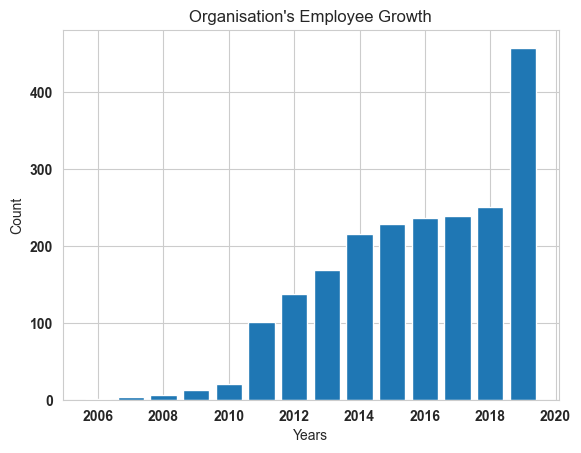

In [ ]:
plt.bar(x =a.columns , height = a.loc[1] )
plt.title("Organisation's Employee Growth")
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

### II. Hiring count over the years (. i.e., # employees hired in a calendar year)

In [ ]:
def calculate_hire_per_year():
    dict_years = {}
    df['year'] = pd.DatetimeIndex(df["Hiring_Date"]).year
    years = set(list(df['year']))
    for year in years:
        result = df[df['year'] == year]
        count_emp = len(set(list(result['Employee_Name'])))
        dict_years[year] = count_emp
    return dict_years


print("Number of hired employees in each year:")
print(calculate_hire_per_year())

Number of hired employees in each year:
{2016: 14, 2017: 6, 2018: 1, 2006: 1, 2007: 2, 2008: 3, 2009: 7, 2010: 9, 2011: 83, 2012: 45, 2013: 44, 2014: 60, 2015: 36}


In [ ]:
hire_per_year = calculate_hire_per_year()

<BarContainer object of 13 artists>

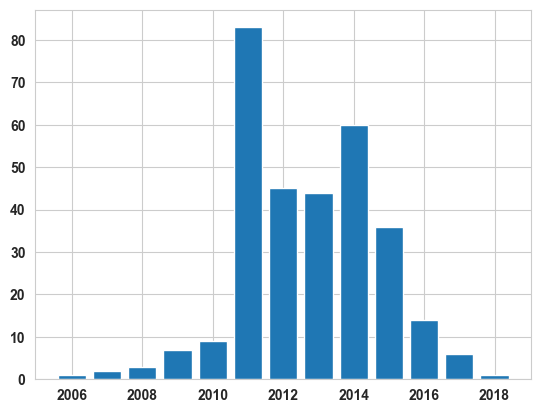

In [ ]:
plt.bar(x = hire_per_year.keys(), height = hire_per_year.values())

### III. Termination count over the years (. i.e., # employees Terminated in a calendar year)

In [ ]:
def calculate_termination_per_year():
    dict_years = {}
    df['year'] = pd.DatetimeIndex(df["Termination_Date"]).year
    years = set(list(df['year']))
    for year in years:
        if year == 2019:
            dict_years[year] = 0

        else:
              result = df[df['year'] == year]
              count_emp = len(set(list(result['Employee_Name'])))
              dict_years[year] = count_emp
    return dict_years


print("Number of active employees in each year:")
print(calculate_termination_per_year())

Number of active employees in each year:
{2016: 22, 2017: 8, 2018: 13, 2019: 0, 2010: 1, 2011: 3, 2012: 8, 2013: 13, 2014: 13, 2015: 23}


In [ ]:
termination_year = calculate_termination_per_year()
termination_year

{2016: 22,
 2017: 8,
 2018: 13,
 2019: 0,
 2010: 1,
 2011: 3,
 2012: 8,
 2013: 13,
 2014: 13,
 2015: 23}

In [ ]:
import os
os. getcwd()

'/Users/priyankaneogi/Desktop/12. CODES/CODES/HV ASSIGNMENTS/CASE STUDIES/6. org profilling'

<BarContainer object of 10 artists>

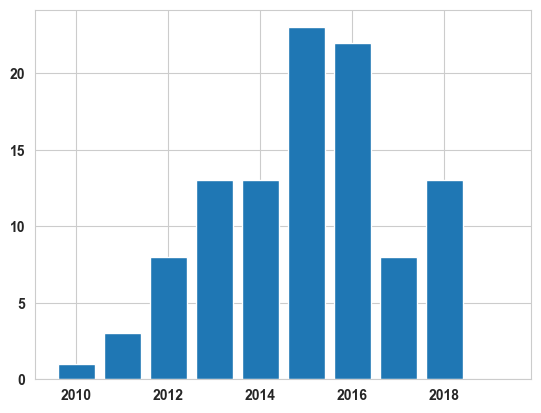

In [ ]:
plt.bar(x = termination_year.keys(), height = termination_year.values())

### 3. Generate a cross-tabulation summary between Hiring Year and Termination year to see how employees hired in a certain year Terminated over time. Also report your findings.


In [ ]:
df1 = data.copy()

In [ ]:
df1['Termination_year'] = df1['Termination_Date'].dt.year
df1['Termination_year'].value_counts()

2015.0    23
2016.0    22
2014.0    13
2013.0    13
2018.0    13
2012.0     8
2017.0     8
2011.0     3
2010.0     1
Name: Termination_year, dtype: int64

In [ ]:
pd.crosstab(df1['Termination_year'], df['Hiring_Year'])

Hiring_Year       2007  2008  2009  2010  2011  2012  2013  2014  2015
Termination_year                                                      
2010.0               1     0     0     0     0     0     0     0     0
2011.0               0     0     0     2     1     0     0     0     0
2012.0               0     0     0     0     8     0     0     0     0
2013.0               0     0     1     0     8     4     0     0     0
2014.0               0     0     0     0    10     1     2     0     0
2015.0               0     1     1     0    10     5     1     2     3
2016.0               0     0     0     1    11     3     3     2     2
2017.0               0     0     0     0     5     2     0     0     1
2018.0               0     0     1     0     6     1     1     3     1

There were maximum no. of terminations from years 2012 to 2016 and the maximum no. of hiring can be seen in the year 2011.

### Plot above using Heatmap

https://towardsdatascience.com/summarizing-data-with-pandas-crosstab-efc8b9abecf


### 4. Show distribution of Terminated cases as per their tenure (create bins on tenure as of termination date: 0-12 months, 13-18 months, 19-24 months, ....). Report your findings on the lines of – “what % of the terminated employees left after xx months of stay with the organization...”

In [ ]:
term_emp = data[data['Terminated'] == 1]
term_emp.head()

Employee_Name  Salary  Terminated                  Position  \
1   Ait Sidi, Karthikeyan     104437           1                   Sr. DBA   
2          Akinkuolie, Sarah   64955           1  Production Technician II   
4           Anderson, Carol    50825           1   Production Technician I   
10      Baczenski, Rachael     54670           1   Production Technician I   
11           Barbara, Thomas   47211           1   Production Technician I   

          DOB Gender Marital_Status Hiring_Date Termination_Date  \
1  1975-05-05     M         Married  2015-03-30       2016-06-16   
2  1988-09-19      F        Married  2011-05-07       2012-09-24   
4  1989-08-09      F       Divorced  2011-11-07       2016-06-09   
10 1974-12-01      F        Married  2011-10-01       2017-12-01   
11 1974-02-21     M         Married  2012-02-04       2016-09-19   

   Termination_Reason  ...         Department    Manager_Name  \
1       career change  ...              IT/IS      Simon Roup   
2               hours  ...  Production         Kissy Sullivan   
4    return to school  ...  Production         Webster Butler   
10   Another position  ...  Production          David Stanley   
11            unhappy  ...  Production         Kissy Sullivan   

    Recruitment_Source Performance_Score Engagement_Survey  \
1               Indeed       Fully Meets              4.96   
2             LinkedIn       Fully Meets              3.02   
4        Google Search       Fully Meets              5.00   
10  Diversity Job Fair       Fully Meets              4.20   
11  Diversity Job Fair       Fully Meets              4.20   

    Satisfaction_Score  Num_Spc_Projects  Last_Perf_Review_Date Dayslate30  \
1                    3                 6             2016-02-24          0   
2                    3                 0             2012-05-15          0   
4                    4                 0             2016-01-02          0   
10                   4                 0             2016-01-30          0   
11                   3                 0             2016-06-05          0   

    Num_Absences  
1             17  
2              3  
4              2  
10            12  
11            15  

[5 rows x 21 columns]

In [ ]:
term_emp.shape

(104, 21)

In [ ]:
term_emp['Term_Tenure_year'] = (term_emp["Termination_Date"] - term_emp['Hiring_Date']).dt.days/365
term_emp['Term_Tenure_month'] = term_emp['Term_Tenure_year'] * 12
term_emp.head()

/var/folders/fj/kksk8jwj0r166kvqshtk4fxc0000gn/T/ipykernel_6781/2958395354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  term_emp['Term_Tenure_year'] = (term_emp["Termination_Date"] - term_emp['Hiring_Date']).dt.days/365
/var/folders/fj/kksk8jwj0r166kvqshtk4fxc0000gn/T/ipykernel_6781/2958395354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  term_emp['Term_Tenure_month'] = term_emp['Term_Tenure_year'] * 12


Employee_Name  Salary  Terminated                  Position  \
1   Ait Sidi, Karthikeyan     104437           1                   Sr. DBA   
2          Akinkuolie, Sarah   64955           1  Production Technician II   
4           Anderson, Carol    50825           1   Production Technician I   
10      Baczenski, Rachael     54670           1   Production Technician I   
11           Barbara, Thomas   47211           1   Production Technician I   

          DOB Gender Marital_Status Hiring_Date Termination_Date  \
1  1975-05-05     M         Married  2015-03-30       2016-06-16   
2  1988-09-19      F        Married  2011-05-07       2012-09-24   
4  1989-08-09      F       Divorced  2011-11-07       2016-06-09   
10 1974-12-01      F        Married  2011-10-01       2017-12-01   
11 1974-02-21     M         Married  2012-02-04       2016-09-19   

   Termination_Reason  ...  Recruitment_Source Performance_Score  \
1       career change  ...              Indeed       Fully Meets   
2               hours  ...            LinkedIn       Fully Meets   
4    return to school  ...       Google Search       Fully Meets   
10   Another position  ...  Diversity Job Fair       Fully Meets   
11            unhappy  ...  Diversity Job Fair       Fully Meets   

   Engagement_Survey Satisfaction_Score Num_Spc_Projects  \
1               4.96                  3                6   
2               3.02                  3                0   
4               5.00                  4                0   
10              4.20                  4                0   
11              4.20                  3                0   

    Last_Perf_Review_Date  Dayslate30  Num_Absences Term_Tenure_year  \
1              2016-02-24           0            17         1.216438   
2              2012-05-15           0             3         1.386301   
4              2016-01-02           0             2         4.591781   
10             2016-01-30           0            12         6.172603   
11             2016-06-05           0            15         4.627397   

    Term_Tenure_month  
1           14.597260  
2           16.635616  
4           55.101370  
10          74.071233  
11          55.528767  

[5 rows x 23 columns]

In [ ]:
term_emp['Term_Tenure_month'].max()

111.02465753424659

In [ ]:
term_emp.loc[term_emp['Term_Tenure_month'].between(0, 12, 'both'), 'Termination_Tenure'] = '0-12 months'
term_emp.loc[term_emp['Term_Tenure_month'].between(13, 18, 'both'), 'Termination_Tenure'] = '13-18 months'
term_emp.loc[term_emp['Term_Tenure_month'].between(19, 24, 'both'), 'Termination_Tenure'] = '13-24 months'
term_emp.loc[term_emp['Term_Tenure_month'].between(24, 36, 'right'), 'Termination_Tenure'] = '2-3 years'
term_emp.loc[term_emp['Term_Tenure_month'].between(36, 60, 'right'), 'Termination_Tenure'] = '3-5 years'
term_emp.loc[term_emp['Term_Tenure_month'].between(60, 120, 'right'), 'Termination_Tenure'] = '> 5 years'

/var/folders/fj/kksk8jwj0r166kvqshtk4fxc0000gn/T/ipykernel_6781/1955693115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  term_emp.loc[term_emp['Term_Tenure_month'].between(0, 12, 'both'), 'Termination_Tenure'] = '0-12 months'


In [ ]:
term_emp.head()

Employee_Name  Salary  Terminated                  Position  \
1   Ait Sidi, Karthikeyan     104437           1                   Sr. DBA   
2          Akinkuolie, Sarah   64955           1  Production Technician II   
4           Anderson, Carol    50825           1   Production Technician I   
10      Baczenski, Rachael     54670           1   Production Technician I   
11           Barbara, Thomas   47211           1   Production Technician I   

          DOB Gender Marital_Status Hiring_Date Termination_Date  \
1  1975-05-05     M         Married  2015-03-30       2016-06-16   
2  1988-09-19      F        Married  2011-05-07       2012-09-24   
4  1989-08-09      F       Divorced  2011-11-07       2016-06-09   
10 1974-12-01      F        Married  2011-10-01       2017-12-01   
11 1974-02-21     M         Married  2012-02-04       2016-09-19   

   Termination_Reason  ... Performance_Score Engagement_Survey  \
1       career change  ...       Fully Meets              4.96   
2               hours  ...       Fully Meets              3.02   
4    return to school  ...       Fully Meets              5.00   
10   Another position  ...       Fully Meets              4.20   
11            unhappy  ...       Fully Meets              4.20   

   Satisfaction_Score Num_Spc_Projects Last_Perf_Review_Date  Dayslate30  \
1                   3                6            2016-02-24           0   
2                   3                0            2012-05-15           0   
4                   4                0            2016-01-02           0   
10                  4                0            2016-01-30           0   
11                  3                0            2016-06-05           0   

    Num_Absences  Term_Tenure_year Term_Tenure_month  Termination_Tenure  
1             17          1.216438         14.597260        13-18 months  
2              3          1.386301         16.635616        13-18 months  
4              2          4.591781         55.101370           3-5 years  
10            12          6.172603         74.071233           > 5 years  
11            15          4.627397         55.528767           3-5 years  

[5 rows x 24 columns]

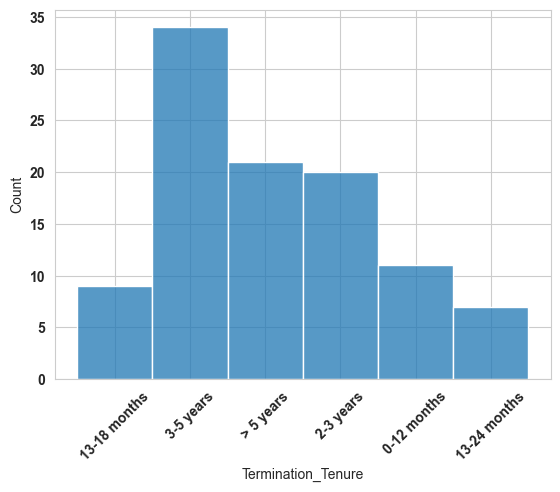

In [ ]:
sns.histplot(term_emp['Termination_Tenure'])
plt.xticks(rotation = 45)
plt.show()

### “what % of the terminated employees left after xx months of stay with the organization...”

In [ ]:
perc_term = term_emp['Termination_Tenure'].value_counts()

In [ ]:
perc_term = pd.DataFrame(term_emp['Termination_Tenure'].value_counts())

In [ ]:
perc_term

Termination_Tenure
3-5 years                     34
> 5 years                     21
2-3 years                     20
0-12 months                   11
13-18 months                   9
13-24 months                   7

In [ ]:
perc_term.index[0]

'3-5 years'

In [ ]:
dict1 = {}
for i in range(len(perc_term)):
    per = perc_term['Termination_Tenure'][i]/perc_term.sum()
    dict1[perc_term.index[i]] = per *100
dict1

{'3-5 years': Termination_Tenure    33.333333
 dtype: float64,
 '> 5 years': Termination_Tenure    20.588235
 dtype: float64,
 '2-3 years': Termination_Tenure    19.607843
 dtype: float64,
 '0-12 months': Termination_Tenure    10.784314
 dtype: float64,
 '13-18 months': Termination_Tenure    8.823529
 dtype: float64,
 '13-24 months': Termination_Tenure    6.862745
 dtype: float64}

### 5. Compute Termination rate for the Salary bins created on percentiles: 0-20%, 20%-40%, 40%-60%, 60%-80% and 80%-100%. Show results using appropriate plot and report your findings

In [ ]:
Salary_percentile = term_emp['Salary'].describe(percentiles = [0, .20, .40, .60, .80, 1])

In [ ]:
Salary_percentile

count       104.000000
mean      65690.076923
std       18679.799457
min       45115.000000
0%        45115.000000
20%       52576.400000
40%       58294.200000
50%       60547.000000
60%       63785.600000
80%       73290.200000
100%     148999.000000
max      148999.000000
Name: Salary, dtype: float64

In [ ]:
term_emp.loc[term_emp['Salary'].between(45115.000000, 52576.400000, 'both'), 'Salary_percentile'] = '0% - 20%'
term_emp.loc[term_emp['Salary'].between(52576.400000, 58294.200000, 'right'), 'Salary_percentile'] = '20% - 40%'
term_emp.loc[term_emp['Salary'].between(58294.200000, 63785.600000, 'right'), 'Salary_percentile'] = '40% - 60%'
term_emp.loc[term_emp['Salary'].between(63785.600000, 73290.200000, 'right'), 'Salary_percentile'] = '60% - 80%'
term_emp.loc[term_emp['Salary'].between(73290.200000, 148999.000000, 'right'), 'Salary_percentile'] = '80% - 100%'

/var/folders/fj/kksk8jwj0r166kvqshtk4fxc0000gn/T/ipykernel_6781/3781978445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  term_emp.loc[term_emp['Salary'].between(45115.000000, 52576.400000, 'both'), 'Salary_percentile'] = '0% - 20%'


In [ ]:
term_emp.head()

Employee_Name  Salary  Terminated                  Position  \
1   Ait Sidi, Karthikeyan     104437           1                   Sr. DBA   
2          Akinkuolie, Sarah   64955           1  Production Technician II   
4           Anderson, Carol    50825           1   Production Technician I   
10      Baczenski, Rachael     54670           1   Production Technician I   
11           Barbara, Thomas   47211           1   Production Technician I   

          DOB Gender Marital_Status Hiring_Date Termination_Date  \
1  1975-05-05     M         Married  2015-03-30       2016-06-16   
2  1988-09-19      F        Married  2011-05-07       2012-09-24   
4  1989-08-09      F       Divorced  2011-11-07       2016-06-09   
10 1974-12-01      F        Married  2011-10-01       2017-12-01   
11 1974-02-21     M         Married  2012-02-04       2016-09-19   

   Termination_Reason  ... Engagement_Survey Satisfaction_Score  \
1       career change  ...              4.96                  3   
2               hours  ...              3.02                  3   
4    return to school  ...              5.00                  4   
10   Another position  ...              4.20                  4   
11            unhappy  ...              4.20                  3   

   Num_Spc_Projects Last_Perf_Review_Date Dayslate30  Num_Absences  \
1                 6            2016-02-24          0            17   
2                 0            2012-05-15          0             3   
4                 0            2016-01-02          0             2   
10                0            2016-01-30          0            12   
11                0            2016-06-05          0            15   

    Term_Tenure_year  Term_Tenure_month Termination_Tenure  Salary_percentile  
1           1.216438          14.597260       13-18 months         80% - 100%  
2           1.386301          16.635616       13-18 months          60% - 80%  
4           4.591781          55.101370          3-5 years           0% - 20%  
10          6.172603          74.071233          > 5 years          20% - 40%  
11          4.627397          55.528767          3-5 years           0% - 20%  

[5 rows x 25 columns]

In [ ]:
term_emp['Salary_percentile'].value_counts()

80% - 100%    21
60% - 80%     21
0% - 20%      21
20% - 40%     21
40% - 60%     20
Name: Salary_percentile, dtype: int64

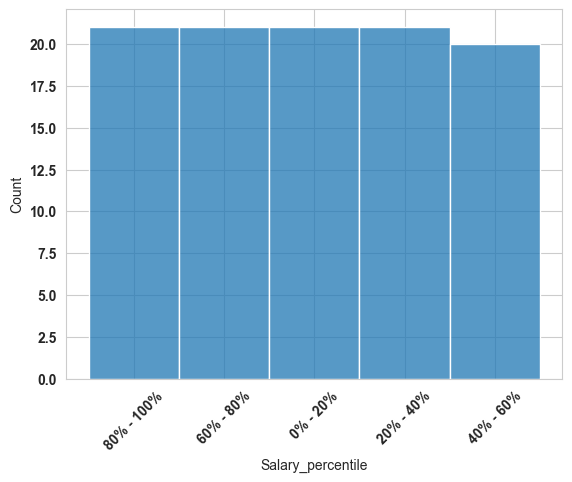

In [ ]:
sns.histplot(term_emp['Salary_percentile'])
plt.xticks(rotation = 45)
plt.show()

## Section 5


### 1. Can we identify the reliable and non-reliable recruitment sources in terms of factors : Employee Performance and Employee Termination (as high/low)?

People recruited from 'Recruitment Source' - 'Indeed' - performed 'Extremly Well' . In terms of 'Active' employees and "performance_score , 'Indeed is a reliable source.


* **Recruitment_Source v/s Curr_Emp_Status**

In [ ]:

cross_tab = pd.crosstab(index=data['Recruitment_Source'],
                        columns=data['Curr_Emp_Status'])


cross_tab_prop = pd.crosstab(index=data['Recruitment_Source'],
                             columns=data['Curr_Emp_Status'],
                             normalize="columns")

print(cross_tab_prop*100)

Curr_Emp_Status             Active  Terminated for Cause  \
Recruitment_Source                                         
CareerBuilder             5.797101                  6.25   
Diversity Job Fair        6.280193                  0.00   
Employee Referral        12.560386                 18.75   
Google Search             9.178744                 31.25   
Indeed                   31.884058                 25.00   
LinkedIn                 28.019324                 18.75   
On-line Web application   0.000000                  0.00   
Other                     0.483092                  0.00   
Website                   5.797101                  0.00   

Curr_Emp_Status          Voluntarily Terminated  
Recruitment_Source                               
CareerBuilder                         11.363636  
Diversity Job Fair                    18.181818  
Employee Referral                      2.272727  
Google Search                         28.409091  
Indeed                                1

<AxesSubplot: xlabel='Recruitment_Source'>

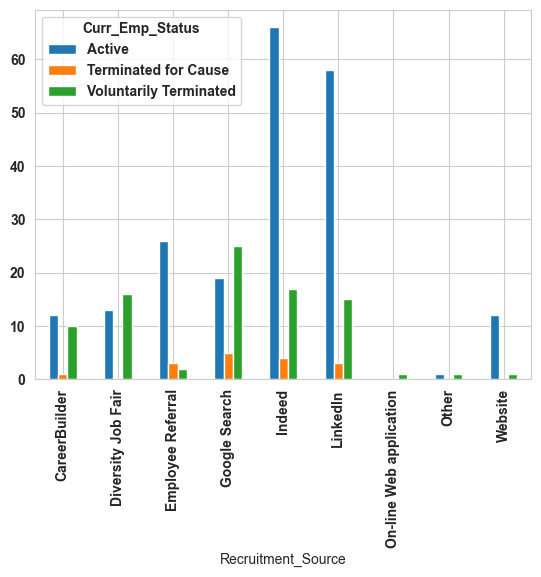

In [ ]:
pd.crosstab(data["Recruitment_Source"],data["Curr_Emp_Status"]).plot(kind = "bar" )

* From 'Recruitment_Source' -  'Indeed' maximum number of employees are 'Active'.
* From 'Recruitment_Source' -  'Google Search' maximum number of employees are under 'Terminated for Cause' and 'Voluntarily Terminated'.
* Least 'Active' employees are from 'Recruitment_Source' - 'On-line Web application' and 'Other'.



* **Recruitment_Source vs Performance_Score**

In [ ]:

cross_tab = pd.crosstab(index=data['Recruitment_Source'],
                        columns=data['Performance_Score'])


cross_tab_prop = pd.crosstab(index=data['Recruitment_Source'],
                             columns=data['Performance_Score'],
                             normalize="index")
print(cross_tab_prop*100)


Performance_Score          Exceeds  Fully Meets  Needs Improvement        PIP
Recruitment_Source                                                           
CareerBuilder             8.695652    73.913043          17.391304   0.000000
Diversity Job Fair       20.689655    62.068966          13.793103   3.448276
Employee Referral        16.129032    80.645161           0.000000   3.225806
Google Search             4.081633    87.755102           6.122449   2.040816
Indeed                   13.793103    75.862069           4.597701   5.747126
LinkedIn                 11.842105    80.263158           3.947368   3.947368
On-line Web application   0.000000   100.000000           0.000000   0.000000
Other                     0.000000   100.000000           0.000000   0.000000
Website                   7.692308    76.923077           0.000000  15.384615


<AxesSubplot: xlabel='Recruitment_Source'>

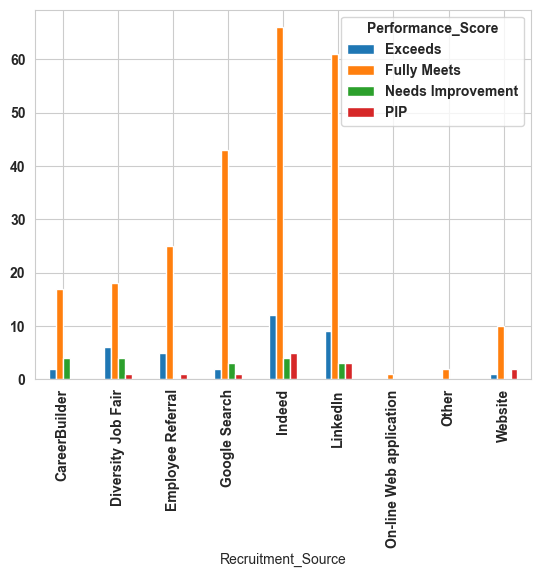

In [ ]:
pd.crosstab(data["Recruitment_Source"],data["Performance_Score"]).plot(kind = "bar" )

* The 'Performance_Score' - 'Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP' is the highest from
  'Recruitment_Source' - 'Indeed'.
* 'Performance_Score' - 'Fully Meets' is the highest from the 'Recruitment_Source - 'On-line Web application' and the next highest is from the 'Recruitment_Source' - 'Google Search'.

* **Performance_Score vs Satisfaction_Score**

### 2. Does employee satisfaction drive their performance?

We can see from the results and plot, lower satisfaction score leads to PIP and the highest satisfaction score leads to 'Exceeds' performance.

In [ ]:
cross_tab = pd.crosstab(index=data['Performance_Score'],
                        columns=data['Satisfaction_Score'])


cross_tab_prop = pd.crosstab(index=data['Performance_Score'],
                             columns=data['Satisfaction_Score'],
                             normalize="index")

print(cross_tab_prop*100)

Satisfaction_Score          1          2          3          4          5
Performance_Score                                                        
Exceeds              0.000000   0.000000  29.729730  29.729730  40.540541
Fully Meets          0.000000   0.411523  35.802469  32.098765  31.687243
Needs Improvement    0.000000  11.111111  38.888889  27.777778  22.222222
PIP                 15.384615  46.153846  23.076923   0.000000  15.384615


<AxesSubplot: xlabel='Performance_Score'>

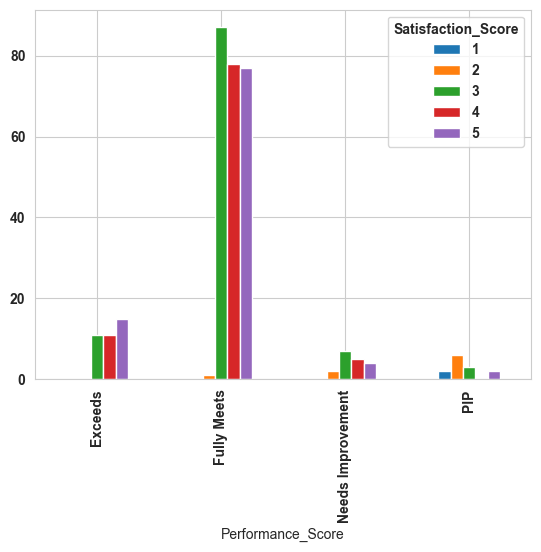

In [ ]:
pd.crosstab(data["Performance_Score"],data['Satisfaction_Score']).plot(kind = "bar" )

* **Manager_Name vs satisfaction_score**

### 5.  How are Managers doing in terms of driving ‘employee satisfaction’?


* The satisfaction score is '5' -  the highest for Manager_Name 'Ketsia Liebig', 'Kissy Sullivan' and 'Michael Albert'.
* The satisfaction score is the lowest for Manager_Name 'John Smith' and 'Michael Albert.

* Overall the average "Satisfaction score" for "Debra Houlihan" is the highest among all the other managers.

In [ ]:
cross_tab = pd.crosstab(index=data['Manager_Name'],
                        columns=data['Satisfaction_Score'])


cross_tab_prop = pd.crosstab(index=data['Manager_Name'],
                             columns=data['Satisfaction_Score'],
                             normalize="columns") * 100

print(cross_tab_prop)

Satisfaction_Score     1          2          3          4         5
Manager_Name                                                       
Alex Sweetwater      0.0   0.000000   2.777778   1.063830  5.102041
Amy Dunn             0.0  11.111111   5.555556  10.638298  4.081633
Board of Directors   0.0   0.000000   1.851852   0.000000  0.000000
Brandon R. LeBlanc   0.0  11.111111   1.851852   3.191489  1.020408
Brannon Miller       0.0  33.333333  10.185185   4.255319  4.081633
Brian Champaigne     0.0   0.000000   2.777778   2.127660  3.061224
David Stanley        0.0   0.000000   6.481481   8.510638  6.122449
Debra Houlihan       0.0   0.000000   0.000000   2.127660  1.020408
Elijiah Gray         0.0   0.000000   7.407407   7.446809  7.142857
Eric Dougall         0.0   0.000000   1.851852   2.127660  0.000000
Janet King           0.0  22.222222   6.481481   6.382979  4.081633
Jennifer Zamora      0.0   0.000000   1.851852   1.063830  4.081633
John Smith          50.0   0.000000   3.703704  

<AxesSubplot: xlabel='Manager_Name'>

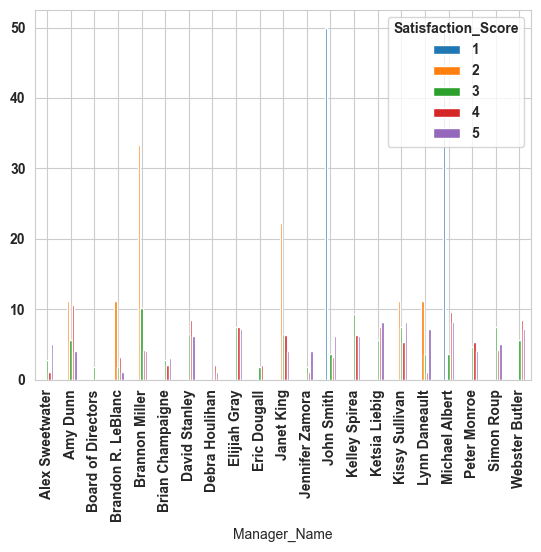

In [ ]:
cross_tab_prop.plot(kind = "bar" )

<Figure size 2000x1000 with 0 Axes>

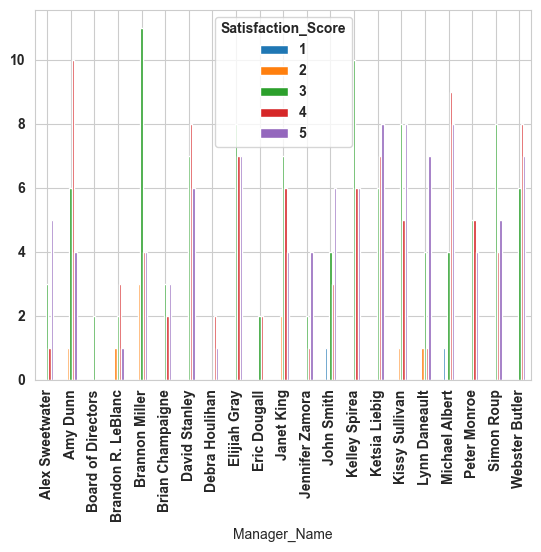

<Figure size 2000x1000 with 0 Axes>

In [ ]:
pd.crosstab(data["Manager_Name"],data['Satisfaction_Score']).plot(kind = "bar" )
plt.figure(figsize = (20,10))

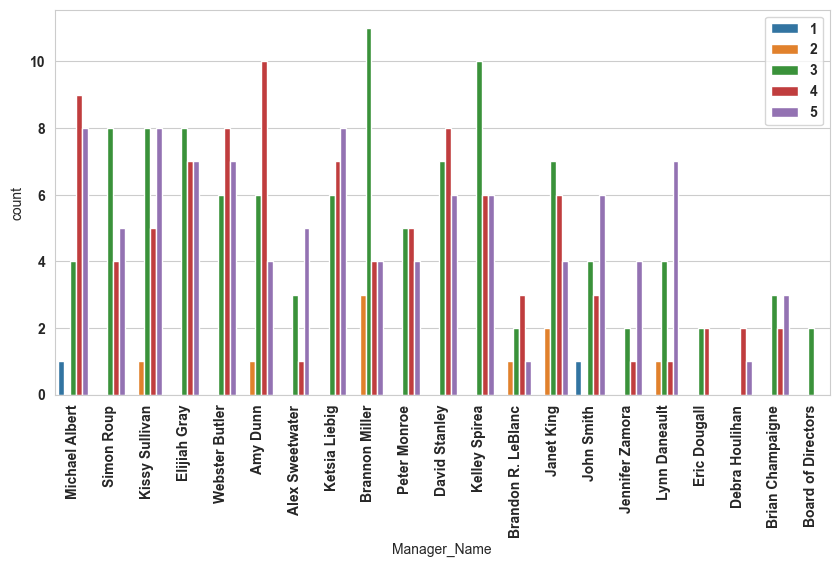

In [ ]:
plt.figure(figsize= (10,5))
sns.set_style('whitegrid')
sns.countplot(x = data["Manager_Name"], hue=data["Satisfaction_Score"])
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

In [ ]:
Average_score = (data.groupby("Manager_Name").mean())  #to find the average Satisfaction score of managers
Average_score

/var/folders/fj/kksk8jwj0r166kvqshtk4fxc0000gn/T/ipykernel_6781/3695559709.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Average_score = (data.groupby("Manager_Name").mean())  #to find the average Satisfaction score of managers


Salary  Terminated  Engagement_Survey  \
Manager_Name                                                       
Alex Sweetwater      98203.222222    0.333333           4.076667   
Amy Dunn             57881.857143    0.619048           3.924762   
Board of Directors  174675.500000    0.000000           4.915000   
Brandon R. LeBlanc   64818.571429    0.285714           4.348571   
Brannon Miller       60095.454545    0.272727           4.041818   
Brian Champaigne     98319.750000    0.000000           4.058750   
David Stanley        56938.571429    0.285714           4.150952   
Debra Houlihan       69240.000000    0.333333           3.840000   
Elijiah Gray         60635.954545    0.363636           4.074545   
Eric Dougall         63188.750000    0.000000           4.585000   
Janet King           94814.842105    0.315789           4.182105   
Jennifer Zamora     136061.142857    0.142857           3.990000   
John Smith           65350.428571    0.214286           3.786429   
Kelley Spirea        58912.181818    0.272727           4.484545   
Ketsia Liebig        56936.666667    0.238095           4.047619   
Kissy Sullivan       57183.818182    0.545455           4.039091   
Lynn Daneault        64482.538462    0.076923           3.796154   
Michael Albert       58343.636364    0.409091           4.066818   
Peter Monroe         73578.500000    0.071429           4.026429   
Simon Roup           99331.411765    0.470588           4.225294   
Webster Butler       57381.238095    0.619048           4.325238   

                    Satisfaction_Score  Num_Spc_Projects  Dayslate30  \
Manager_Name                                                           
Alex Sweetwater               4.222222          4.555556    0.444444   
Amy Dunn                      3.809524          0.000000    0.714286   
Board of Directors            3.000000          1.000000    0.000000   
Brandon R. LeBlanc            3.571429          4.428571    0.000000   
Brannon Miller                3.409091          0.181818    1.000000   
Brian Champaigne              4.000000          6.125000    0.000000   
David Stanley                 3.952381          0.000000    0.190476   
Debra Houlihan                4.333333          0.000000    0.666667   
Elijiah Gray                  3.954545          0.000000    0.500000   
Eric Dougall                  3.500000          5.250000    0.000000   
Janet King                    3.631579          0.315789    0.315789   
Jennifer Zamora               4.285714          5.857143    0.571429   
John Smith                    3.928571          0.000000    0.642857   
Kelley Spirea                 3.818182          0.000000    0.227273   
Ketsia Liebig                 4.095238          0.000000    0.190476   
Kissy Sullivan                3.909091          0.000000    0.500000   
Lynn Daneault                 4.076923          0.000000    0.692308   
Michael Albert                4.045455          0.000000    0.590909   
Peter Monroe                  3.928571          6.071429    0.214286   
Simon Roup                    3.823529          5.823529    0.000000   
Webster Butler                4.047619          0.000000    0.333333   

                    Num_Absences  
Manager_Name                      
Alex Sweetwater         9.777778  
Amy Dunn                9.523810  
Board of Directors      6.500000  
Brandon R. LeBlanc      7.857143  
Brannon Miller          9.181818  
Brian Champaigne       12.500000  
David Stanley          10.380952  
Debra Houlihan          8.666667  
Elijiah Gray            9.136364  
Eric Dougall            9.000000  
Janet King             10.210526  
Jennifer Zamora         9.285714  
John Smith             13.357143  
Kelley Spirea          11.363636  
Ketsia Liebig           9.142857  
Kissy Sullivan         10.590909  
Lynn Daneault           9.692308  
Michael Albert         10.909091  
Peter Monroe           10.571429  
Simon Roup              9.470588  
Webster Butler         11.857143

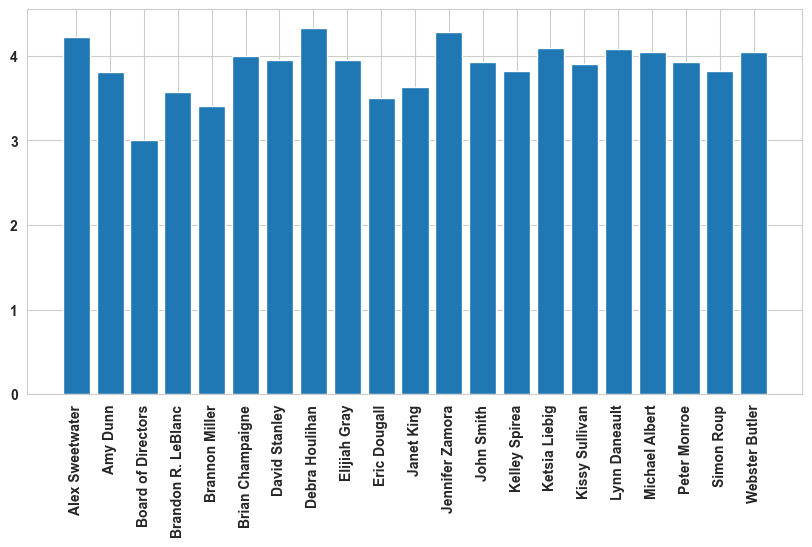

In [ ]:
plt.figure(figsize= (10,5))
plt.xticks(rotation=90)
plt.bar(x = Average_score.index, height = Average_score.iloc[:,3])
plt.show()

* **Performance_Score vs Engagement_Survey**

### 3. Does employee engagement drive their performance? Round engagement survey score to 0 decimal places.

Yes Employee Engagement drives thier survey. The employees with Engagement Survey 4 and 5 have high performance score as 'Exceeds' and 'Fully Meets'.

In [ ]:
data['Engagement_Survey'] = data['Engagement_Survey'].round()
data['Engagement_Survey'] = data['Engagement_Survey'].astype('int64')


In [ ]:
cross_tab = pd.crosstab(index=data['Performance_Score'],
                        columns=data['Engagement_Survey'])


cross_tab_prop = pd.crosstab(index=data['Performance_Score'],
                             columns=data['Engagement_Survey'],
                             normalize="columns")

print(cross_tab_prop*100)

Engagement_Survey      1          2          3          4          5
Performance_Score                                                   
Exceeds              0.0   0.000000   0.000000  13.698630  16.504854
Fully Meets          0.0   0.000000  88.372093  82.191781  82.524272
Needs Improvement    0.0  58.823529   2.325581   4.109589   0.970874
PIP                100.0  41.176471   9.302326   0.000000   0.000000


<AxesSubplot: xlabel='Performance_Score'>

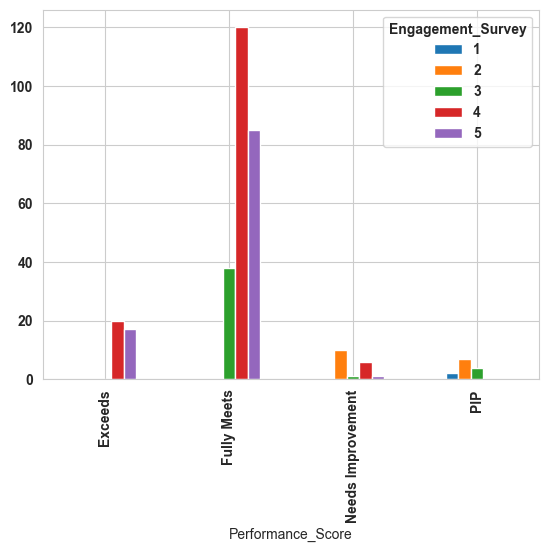

In [ ]:
pd.crosstab(data["Performance_Score"],data['Engagement_Survey']).plot(kind = "bar" )

### 4. Are more engaged employees more satisfied? Round engagement survey score to 0 decimal places.

The more 'Engaged employee' giving score '4' are more satisfied than employees with 'Engagement score' 5 .


* **Satisfaction_Score vs Engagement_Survey**

In [ ]:
cross_tab = pd.crosstab(index=data['Satisfaction_Score'],
                        columns=data['Engagement_Survey'])


cross_tab_prop = pd.crosstab(index=data['Satisfaction_Score'],
                             columns=data['Engagement_Survey'],
                             normalize="index")

print(cross_tab_prop*100)

Engagement_Survey           1          2          3          4          5
Satisfaction_Score                                                       
1                    0.000000  50.000000  50.000000   0.000000   0.000000
2                   11.111111  44.444444  22.222222  22.222222   0.000000
3                    0.925926   5.555556  15.740741  44.444444  33.333333
4                    0.000000   1.063830  13.829787  47.872340  37.234043
5                    0.000000   5.102041  10.204082  52.040816  32.653061


<AxesSubplot: xlabel='Satisfaction_Score'>

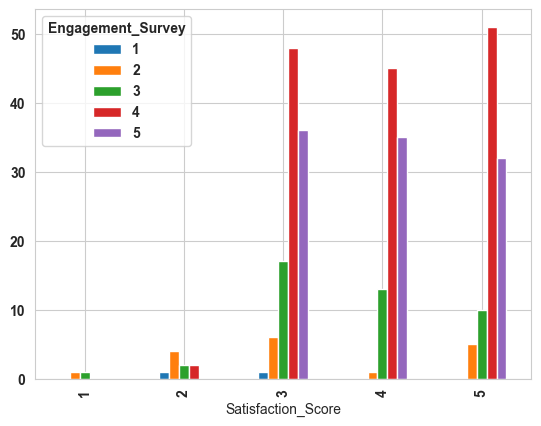

In [ ]:
pd.crosstab(data["Satisfaction_Score"],data['Engagement_Survey']).plot(kind = "bar" )

### 6. Does employee engagement and satisfaction differ for different levels of tenure? Consider only employees active as of 31st Dec’1 for this summary/analysis.

In [ ]:
active_emp.head()

Employee_Name  Salary  Terminated                 Position  \
0  Adinolfi, Wilson  K   62506           0  Production Technician I   
3         Alagbe,Trina   64991           0  Production Technician I   
5    Anderson, Linda     57568           0  Production Technician I   
6      Andreola, Colby   95660           0        Software Engineer   
7          Athwal, Sam   59365           0  Production Technician I   

         DOB Gender Marital_Status Hiring_Date Termination_Date  \
0 1983-10-07     M          Single  2011-05-07       2018-12-31   
3 1988-09-27      F        Married  2008-07-01       2018-12-31   
5 1977-05-22      F         Single  2012-09-01       2018-12-31   
6 1979-05-24      F         Single  2014-10-11       2018-12-31   
7 1983-02-18     M         Widowed  2013-09-30       2018-12-31   

  Termination_Reason  ... Performance_Score Engagement_Survey  \
0  N/A-StillEmployed  ...           Exceeds              4.60   
3  N/A-StillEmployed  ...       Fully Meets              4.84   
5  N/A-StillEmployed  ...           Exceeds              5.00   
6  N/A-StillEmployed  ...       Fully Meets              3.04   
7  N/A-StillEmployed  ...       Fully Meets              5.00   

  Satisfaction_Score Num_Spc_Projects Last_Perf_Review_Date  Dayslate30  \
0                  5                0            2019-01-17           0   
3                  5                0            2019-03-01           0   
5                  5                0            2019-07-01           0   
6                  3                4            2019-02-01           0   
7                  4                0            2019-02-25           0   

   Num_Absences  Experience_years Experience_months  Employee_Tenure  
0             1               8.0         91.890411         >5 years  
3            15              11.0        126.082192         >5 years  
5            15               6.0         76.010959         >5 years  
6            19               4.0         50.695890        3-5 years  
7            19               5.0         63.057534         >5 years  

[5 rows x 24 columns]

In [ ]:
active_emp['Engagement_Survey'] = active_emp['Engagement_Survey'].round()

/var/folders/fj/kksk8jwj0r166kvqshtk4fxc0000gn/T/ipykernel_6781/607712116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_emp['Engagement_Survey'] = active_emp['Engagement_Survey'].round()


In [ ]:
active_emp.head()

Employee_Name  Salary  Terminated                 Position  \
0  Adinolfi, Wilson  K   62506           0  Production Technician I   
3         Alagbe,Trina   64991           0  Production Technician I   
5    Anderson, Linda     57568           0  Production Technician I   
6      Andreola, Colby   95660           0        Software Engineer   
7          Athwal, Sam   59365           0  Production Technician I   

         DOB Gender Marital_Status Hiring_Date Termination_Date  \
0 1983-10-07     M          Single  2011-05-07       2018-12-31   
3 1988-09-27      F        Married  2008-07-01       2018-12-31   
5 1977-05-22      F         Single  2012-09-01       2018-12-31   
6 1979-05-24      F         Single  2014-10-11       2018-12-31   
7 1983-02-18     M         Widowed  2013-09-30       2018-12-31   

  Termination_Reason  ... Performance_Score Engagement_Survey  \
0  N/A-StillEmployed  ...           Exceeds               5.0   
3  N/A-StillEmployed  ...       Fully Meets               5.0   
5  N/A-StillEmployed  ...           Exceeds               5.0   
6  N/A-StillEmployed  ...       Fully Meets               3.0   
7  N/A-StillEmployed  ...       Fully Meets               5.0   

  Satisfaction_Score Num_Spc_Projects Last_Perf_Review_Date  Dayslate30  \
0                  5                0            2019-01-17           0   
3                  5                0            2019-03-01           0   
5                  5                0            2019-07-01           0   
6                  3                4            2019-02-01           0   
7                  4                0            2019-02-25           0   

   Num_Absences  Experience_years Experience_months  Employee_Tenure  
0             1               8.0         91.890411         >5 years  
3            15              11.0        126.082192         >5 years  
5            15               6.0         76.010959         >5 years  
6            19               4.0         50.695890        3-5 years  
7            19               5.0         63.057534         >5 years  

[5 rows x 24 columns]

* **Employee_Tenure vs Engagement_Survey**

In [ ]:
cross_tab = pd.crosstab(index=active_emp['Employee_Tenure'],
                        columns=active_emp['Engagement_Survey'])


cross_tab_prop = (pd.crosstab(index=active_emp['Employee_Tenure'],
                             columns=active_emp['Engagement_Survey'],
                             normalize="columns") * 100)

print(cross_tab_prop)

Engagement_Survey    1.0        2.0        3.0        4.0        5.0
Employee_Tenure                                                     
13-18 months         0.0   0.000000   0.000000   0.000000   1.515152
19-24 months         0.0   0.000000  11.111111   0.990099   0.000000
2-3 years            0.0   0.000000  14.814815   6.930693   4.545455
3-5 years          100.0  55.555556  44.444444  32.673267  45.454545
>5 years             0.0  44.444444  29.629630  59.405941  48.484848


<AxesSubplot: xlabel='Employee_Tenure'>

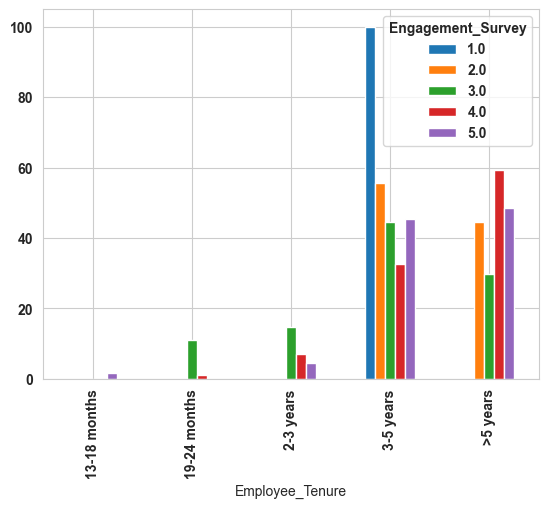

In [ ]:
cross_tab_prop.plot(kind = "bar")

<AxesSubplot: xlabel='Employee_Tenure'>

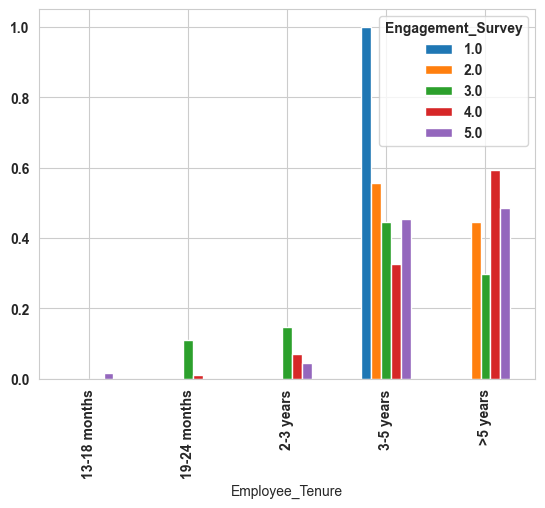

In [ ]:
pd.crosstab(active_emp["Employee_Tenure"],active_emp['Engagement_Survey'],normalize="columns").plot(kind = "bar" )

* With increase in Employee Tenure , there is increase in Engagement Survey. The most Engagement Survey is coming out to be 4.0 for most of the tenures.


* **Employee_Tenure vs Satisfaction_score**

In [ ]:
cross_tab = pd.crosstab(index=active_emp['Employee_Tenure'],
                        columns=active_emp['Satisfaction_Score'])


cross_tab_prop = pd.crosstab(index=active_emp['Employee_Tenure'],
                             columns=active_emp['Satisfaction_Score'],
                             normalize="index")

print(cross_tab_prop*100)

Satisfaction_Score         1         2           3          4          5
Employee_Tenure                                                         
13-18 months        0.000000  0.000000  100.000000   0.000000   0.000000
19-24 months        0.000000  0.000000   25.000000  25.000000  50.000000
2-3 years           0.000000  0.000000   21.428571  42.857143  35.714286
3-5 years           1.219512  2.439024   37.804878  26.829268  31.707317
>5 years            0.961538  2.884615   36.538462  25.000000  34.615385


<AxesSubplot: xlabel='Employee_Tenure'>

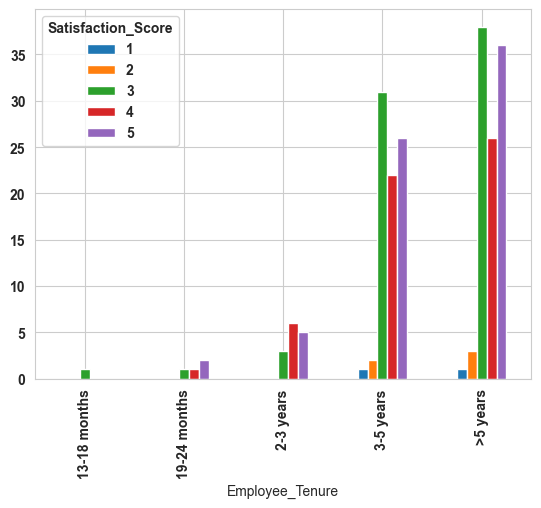

In [ ]:
pd.crosstab(active_emp["Employee_Tenure"],active_emp['Satisfaction_Score']).plot(kind = "bar" )

* With increase in Employee Tenure , there is increase in Satisfaction_Score.

### 7. Which of ‘employee satisfaction’, ‘employee engagement’ or ‘performance’ is driving Termination the most?

In [ ]:
term_emp.head()

Employee_Name  Salary  Terminated                  Position  \
1   Ait Sidi, Karthikeyan     104437           1                   Sr. DBA   
2          Akinkuolie, Sarah   64955           1  Production Technician II   
4           Anderson, Carol    50825           1   Production Technician I   
10      Baczenski, Rachael     54670           1   Production Technician I   
11           Barbara, Thomas   47211           1   Production Technician I   

          DOB Gender Marital_Status Hiring_Date Termination_Date  \
1  1975-05-05     M         Married  2015-03-30       2016-06-16   
2  1988-09-19      F        Married  2011-05-07       2012-09-24   
4  1989-08-09      F       Divorced  2011-11-07       2016-06-09   
10 1974-12-01      F        Married  2011-10-01       2017-12-01   
11 1974-02-21     M         Married  2012-02-04       2016-09-19   

   Termination_Reason  ... Engagement_Survey Satisfaction_Score  \
1       career change  ...              4.96                  3   
2               hours  ...              3.02                  3   
4    return to school  ...              5.00                  4   
10   Another position  ...              4.20                  4   
11            unhappy  ...              4.20                  3   

   Num_Spc_Projects Last_Perf_Review_Date Dayslate30  Num_Absences  \
1                 6            2016-02-24          0            17   
2                 0            2012-05-15          0             3   
4                 0            2016-01-02          0             2   
10                0            2016-01-30          0            12   
11                0            2016-06-05          0            15   

    Term_Tenure_year  Term_Tenure_month Termination_Tenure  Salary_percentile  
1           1.216438          14.597260       13-18 months         80% - 100%  
2           1.386301          16.635616       13-18 months          60% - 80%  
4           4.591781          55.101370          3-5 years           0% - 20%  
10          6.172603          74.071233          > 5 years          20% - 40%  
11          4.627397          55.528767          3-5 years           0% - 20%  

[5 rows x 25 columns]

In [ ]:
term_emp['Engagement_Survey'] = term_emp['Engagement_Survey'].round()

/var/folders/fj/kksk8jwj0r166kvqshtk4fxc0000gn/T/ipykernel_6781/1905961105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  term_emp['Engagement_Survey'] = term_emp['Engagement_Survey'].round()


In [ ]:
term_emp.head(2)

Employee_Name  Salary  Terminated                  Position  \
1  Ait Sidi, Karthikeyan     104437           1                   Sr. DBA   
2         Akinkuolie, Sarah   64955           1  Production Technician II   

         DOB Gender Marital_Status Hiring_Date Termination_Date  \
1 1975-05-05     M         Married  2015-03-30       2016-06-16   
2 1988-09-19      F        Married  2011-05-07       2012-09-24   

  Termination_Reason  ... Engagement_Survey Satisfaction_Score  \
1      career change  ...               5.0                  3   
2              hours  ...               3.0                  3   

  Num_Spc_Projects Last_Perf_Review_Date Dayslate30  Num_Absences  \
1                6            2016-02-24          0            17   
2                0            2012-05-15          0             3   

   Term_Tenure_year  Term_Tenure_month Termination_Tenure  Salary_percentile  
1          1.216438          14.597260       13-18 months         80% - 100%  
2          1.386301          16.635616       13-18 months          60% - 80%  

[2 rows x 25 columns]

In [ ]:
term_emp['Engagement_Survey'].value_counts()

4.0    44
5.0    36
3.0    16
2.0     8
Name: Engagement_Survey, dtype: int64

In [ ]:
term_emp['Satisfaction_Score'].value_counts()

4    38
3    33
5    29
2     4
Name: Satisfaction_Score, dtype: int64

In [ ]:
term_emp['Performance_Score'].value_counts()

Fully Meets          81
Needs Improvement    10
Exceeds               8
PIP                   5
Name: Performance_Score, dtype: int64

* The employees mostly terminated are from 'Performance score' - Fully Meets. But this fator determines the actual termination cause. Hence the given parameters don't help in determining the 'Termination'.

### Section 4

### 6. Observe Termination rate for different object and discrete variables (for their respective labels/values) and report your findings. Create these summaries only for relevant object/discrete variables (decide based on your understanding of data)


In [ ]:
crit = term_emp['Performance_Score'] == 'Fully Meets'

In [ ]:
term = term_emp[crit]

In [ ]:
term['Termination_Reason'].value_counts()

Another position                    17
unhappy                             10
more money                           9
hours                                8
career change                        6
return to school                     5
relocation out of area               5
attendance                           4
retiring                             3
military                             3
no-call, no-show                     3
medical issues                       3
performance                          2
maternity leave - did not return     2
Learned that he is a gangster        1
Name: Termination_Reason, dtype: int64

In [ ]:
term_emp['Termination_Reason'].value_counts()

Another position                    20
unhappy                             14
more money                          11
career change                        9
hours                                8
attendance                           7
return to school                     5
relocation out of area               5
no-call, no-show                     4
military                             4
retiring                             4
performance                          4
maternity leave - did not return     3
medical issues                       3
Learned that he is a gangster        1
Fatal attraction                     1
gross misconduct                     1
Name: Termination_Reason, dtype: int64

* Most of the employees are terminated from the 'Performance_Score' - 'Fully Meets'.  Inside them the most 'Termination_Reason' is -

1. Another position
2. unhappy
3. more money

* The above three factors are required to be worked upon to avoid 'Termination'.